In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows",500)

Let us load the data in the Jupyter Notebook by the name `df`

In [2]:
df=pd.read_csv("E:/Upgrad/EDA/upg-Assignment/loan/loan.csv",low_memory=False)

Let us go through the data and do data cleaning so that to get the correct analysis

## Data Cleaning

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Let us find null values throughout the columns in  the dataset

In [5]:
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
round((df.isnull().sum()/len(df))*100,2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

When we see the number of null present in the column we will find that there are columns where whole column is null so let's remove that columns from the dataset

We are removing those columns which have more than 50% of the null values present in the columns

In [7]:
round((df.isnull().sum()/len(df))*100,2)[round((df.isnull().sum()/len(df))*100,2)>50].count()

57

There are total 54 columns which are going to be removed from the dataset because these columns have more than 50% columns as null values

In [8]:
df.drop(round((df.isnull().sum()/len(df))*100,2)[round((df.isnull().sum()/len(df))*100,2)>50].index,axis=1,inplace=True)

In [9]:
df.shape

(39717, 54)

In [10]:
round((df.isnull().sum()/len(df))*100,2)[round((df.isnull().sum()/len(df))*100,2)!=0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

**Lets drop following columns as these will not help in our analysis and moreover all are categorical values.The range of values that these categorical columns are will not give any significant impact to the analysis.
<br> So we can drop these columns for analysis**

In [11]:
df.drop(["title","emp_title","desc","collections_12_mths_ex_med", "chargeoff_within_12_mths", "tax_liens"],axis=1,inplace=True)

In [12]:
df.shape

(39717, 48)

In [13]:
round((df.isnull().sum()/len(df))*100,2)[round((df.isnull().sum()/len(df))*100,2)!=0]

emp_length              2.71
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

**emp_length:** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years<br>
Lets remove those null value present `emp_length` and keep only rows which are not null

In [14]:
df=df.loc[df.emp_length.notna()]

In [15]:
round((df.isnull().sum()/len(df))*100,2)[round((df.isnull().sum()/len(df))*100,2)!=0]

revol_util              0.12
last_pymnt_d            0.17
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.80
dtype: float64

**revol_util:** Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.<br>
**pub_rec_bankruptcies:** Number of public record bankruptcies

**As we see we are left with few columns which have null values. As we look onto the percentage of the columns having null values are less than 2% so we can impute or remove these rows which have null values present in these columns<br> Moreover all columns mentioned above are categorical columns due to which they are few values present in the columns, if we impute with some other values then we making bias against that values,therefore we decided to delete that rows which have null values present in the columns**

In [16]:
df=df.loc[df.revol_util.notna()]
df=df.loc[df.last_pymnt_d.notna()]
df=df.loc[df.last_credit_pull_d.notna()]
df=df.loc[df.pub_rec_bankruptcies.notna()]

In [17]:
round((df.isnull().sum()/len(df))*100,2)

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
url                        0.0
purpose                    0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
initial_list_status        0.0
out_prncp                  0.0
out_prnc

`As we see above cell we have removed all the null values present in the dataset`

In [18]:
df.shape

(37835, 48)

In [19]:
len(df)*100/39717

95.2614749351663

`After doing data cleaning on the columns we retained 95% of the data`

`Let's now analyse all the columns in the resulted dataframe and find only the ones with are required or make sense  for the analysis`

In [20]:
df.nunique().sort_values()

initial_list_status            1
acc_now_delinq                 1
application_type               1
policy_code                    1
pymnt_plan                     1
delinq_amnt                    1
term                           2
loan_status                    3
verification_status            3
pub_rec_bankruptcies           3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     81
last_pymnt_d                  97
last_credit_pull_d            97
int_rate                     337
earliest_cr_line             514
zip_code                     809
loan_amnt                    869
funded_amnt                 1031
revol_util                  1087
out_prncp 

There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.

In [21]:
df.drop(['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt'],axis=1,inplace=True)

In [22]:
df.shape

(37835, 36)

In [23]:
df.head().T

,0,1,2,3,4
loan_amnt,5000,2500,2400,10000,3000
term,36 months,60 months,36 months,36 months,60 months
int_rate,10.65%,15.27%,15.96%,13.49%,12.69%
installment,162.87,59.83,84.33,339.31,67.79
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5
emp_length,10+ years,< 1 year,10+ years,10+ years,1 year
home_ownership,RENT,RENT,RENT,RENT,RENT
annual_inc,24000,30000,12252,49200,80000
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,37835.0,11328.321660,7477.228389,500.00,5600.000000,10000.00000,15000.000000,3.500000e+04
installment,37835.0,327.138924,209.085008,16.08,168.750000,283.20000,434.750000,1.305190e+03
annual_inc,37835.0,69670.974443,63643.372729,4000.00,41886.000000,60000.00000,83500.000000,6.000000e+06
dti,37835.0,13.377173,6.655964,0.00,8.270000,13.47000,18.630000,2.999000e+01
delinq_2yrs,37835.0,0.145817,0.490501,0.00,0.000000,0.00000,0.000000,1.100000e+01
inq_last_6mths,37835.0,0.866816,1.066483,0.00,0.000000,1.00000,1.000000,8.000000e+00
open_acc,37835.0,9.325096,4.375401,2.00,6.000000,9.00000,12.000000,4.400000e+01
pub_rec,37835.0,0.053707,0.234746,0.00,0.000000,0.00000,0.000000,4.000000e+00
revol_bal,37835.0,13479.951659,15877.285797,0.00,3791.000000,8978.00000,17183.500000,1.495880e+05
total_acc,37835.0,22.199260,11.382805,2.00,14.000000,21.00000,29.000000,9.000000e+01


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37835 entries, 0 to 39680
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37835 non-null  int64  
 1   term                     37835 non-null  object 
 2   int_rate                 37835 non-null  object 
 3   installment              37835 non-null  float64
 4   grade                    37835 non-null  object 
 5   sub_grade                37835 non-null  object 
 6   emp_length               37835 non-null  object 
 7   home_ownership           37835 non-null  object 
 8   annual_inc               37835 non-null  float64
 9   verification_status      37835 non-null  object 
 10  issue_d                  37835 non-null  object 
 11  loan_status              37835 non-null  object 
 12  purpose                  37835 non-null  object 
 13  addr_state               37835 non-null  object 
 14  dti                   

**term:** The number of payments on the loan. Values are in months and can be either 36 or 60

In [26]:
df.term.head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

**int_rate:** Interest Rate on the loan

In [27]:
df.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

Lets remove % sign from the term as we dont need it, we know its in %

In [28]:
df.int_rate=df.int_rate.str.strip("%").astype(float)

In [29]:
df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,37835.0,11328.321660,7477.228389,500.00,5600.000000,10000.00000,15000.000000,3.500000e+04
int_rate,37835.0,12.071015,3.734431,5.42,9.320000,11.86000,14.610000,2.459000e+01
installment,37835.0,327.138924,209.085008,16.08,168.750000,283.20000,434.750000,1.305190e+03
annual_inc,37835.0,69670.974443,63643.372729,4000.00,41886.000000,60000.00000,83500.000000,6.000000e+06
dti,37835.0,13.377173,6.655964,0.00,8.270000,13.47000,18.630000,2.999000e+01
delinq_2yrs,37835.0,0.145817,0.490501,0.00,0.000000,0.00000,0.000000,1.100000e+01
inq_last_6mths,37835.0,0.866816,1.066483,0.00,0.000000,1.00000,1.000000,8.000000e+00
open_acc,37835.0,9.325096,4.375401,2.00,6.000000,9.00000,12.000000,4.400000e+01
pub_rec,37835.0,0.053707,0.234746,0.00,0.000000,0.00000,0.000000,4.000000e+00
revol_bal,37835.0,13479.951659,15877.285797,0.00,3791.000000,8978.00000,17183.500000,1.495880e+05


In [31]:
df.dtypes

loan_amnt                    int64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int       

In [32]:
df.head().T

,0,1,2,3,4
loan_amnt,5000,2500,2400,10000,3000
term,36 months,60 months,36 months,36 months,60 months
int_rate,10.65,15.27,15.96,13.49,12.69
installment,162.87,59.83,84.33,339.31,67.79
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5
emp_length,10+ years,< 1 year,10+ years,10+ years,1 year
home_ownership,RENT,RENT,RENT,RENT,RENT
annual_inc,24000,30000,12252,49200,80000
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified


`As we see above cells we have few date time columns but they are in object datatype. So lets convert those columns into date time format`<br>**Columns which are to be date time format but are in object datatype are:<br>
1.issue_d:** The month which the loan was funded<br>
**2.earliest_cr_line:** The month the borrower's earliest reported credit line was opened<br> 
**3.last_pymnt_d:** Last month payment was received<br>
**4.last_credit_pull_d:** The most recent month LC pulled credit for this loan

In [33]:
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y')
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')

In [34]:
df.dtypes

loan_amnt                           int64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetime64[ns]
inq_last_6mths                      int64
open_acc                            int64
pub_rec                             int64
revol_bal                           int64
revol_util                         object
total_acc                           int64
out_prncp                         

We can extract month and year from the earliest_cr_line to do analysis on that column to find when more were taken and etc.<br>
And same extraction of the month and year can be done on the other date time column for analysis

In [35]:
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year
df['last_credit_pull_d_month'] = df['last_credit_pull_d'].dt.month
df['last_credit_pull_d_year'] = df['last_credit_pull_d'].dt.year

In [36]:
df.dtypes

loan_amnt                            int64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_length                          object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6mths                       int64
open_acc                             int64
pub_rec                              int64
revol_bal                            int64
revol_util                          object
total_acc                            int64
out_prncp  

In [37]:
df.earliest_cr_line_year.value_counts()

2000    3123
1999    2868
1998    2743
2001    2438
1997    2354
1996    2183
1995    2055
1994    1933
2002    1849
2003    1788
2004    1696
2005    1444
1993    1439
2006    1120
1992    1009
1990     980
1991     927
1989     813
1988     699
2007     686
1987     593
1986     468
1985     429
1984     375
1983     316
1982     202
1981     164
1980     162
2008     149
1979     145
1978     140
1977     101
1976      77
1975      66
1974      55
1973      47
1971      39
1972      38
1970      37
1969      26
2067      15
2068      14
2066       8
2065       7
2063       4
2064       4
2062       3
2046       1
2056       1
2054       1
2050       1
Name: earliest_cr_line_year, dtype: int64

As we see at the last of values of cell we notice that earliest_cr_line_year contains values beyond 2011 which should be happen as dataset contains till year 2011. So we romove those values which are after year 2011.

In [38]:
df.drop(df.loc[df.earliest_cr_line_year>2011].index,axis=0,inplace=True)

In [39]:
df.earliest_cr_line_month.value_counts()

10    3884
12    3860
11    3745
9     3405
1     3290
8     3156
7     2919
6     2797
5     2755
2     2726
3     2628
4     2611
Name: earliest_cr_line_month, dtype: int64

In [40]:
df.dtypes

loan_amnt                            int64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_length                          object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6mths                       int64
open_acc                             int64
pub_rec                              int64
revol_bal                            int64
revol_util                          object
total_acc                            int64
out_prncp  

As we see revol_util column is object datatype but it should be in numeric datatype to fit in that defination stated above

In [41]:
df.revol_util.value_counts()

0%        901
0.20%      59
61%        56
66.60%     56
40.70%     56
         ... 
17.67%      1
0.46%       1
33.29%      1
39.95%      1
24.65%      1
Name: revol_util, Length: 1086, dtype: int64

As we see above because of the % sign it is object datatype, lets us remove the % sign to make it as numeric datatype

In [42]:
df['revol_util'] = df['revol_util'].str.strip('%').astype('float')

In [43]:
df.dtypes

loan_amnt                            int64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_length                          object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6mths                       int64
open_acc                             int64
pub_rec                              int64
revol_bal                            int64
revol_util                         float64
total_acc                            int64
out_prncp  

**total_pymnt:** Payments received to date for total amount funded<br>
There is a column named total_pymnt which we can use to find balance payment of all loans with the help of laon_amnt column and the result obtained by these columns will be saved in balance_pymnt variable

In [44]:
df["balance_pymnt"]=df.loan_amnt-df.total_pymnt

In [45]:
df.shape

(37776, 45)

In [46]:
len(df)*100/39717

95.11292393685324

After the data cleaning we have obtained 95% of the data from the earlier dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37776 entries, 0 to 39680
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   loan_amnt                 37776 non-null  int64         
 1   term                      37776 non-null  object        
 2   int_rate                  37776 non-null  float64       
 3   installment               37776 non-null  float64       
 4   grade                     37776 non-null  object        
 5   sub_grade                 37776 non-null  object        
 6   emp_length                37776 non-null  object        
 7   home_ownership            37776 non-null  object        
 8   annual_inc                37776 non-null  float64       
 9   verification_status       37776 non-null  object        
 10  issue_d                   37776 non-null  datetime64[ns]
 11  loan_status               37776 non-null  object        
 12  purpose           

In [48]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,balance_pymnt
count,37776.000000,37776.000000,37776.000000,3.777600e+04,37776.000000,37776.00000,37776.000000,37776.000000,37776.000000,37776.000000,...,37776.000000,37776.000000,37776.000000,37776.000000,37776.000000,37776.000000,37776.000000,37776.000000,37776.000000,37776.000000
mean,11325.135668,12.071198,327.057429,6.964193e+04,13.375867,0.14586,0.867111,9.322268,0.053553,13465.811388,...,0.041375,6.890830,1996.764136,7.214845,2010.368488,6.451080,2012.866503,5.810779,2014.331057,-981.467180
std,7473.945271,3.734354,209.022481,6.364058e+04,6.655606,0.49050,1.066559,4.374430,0.234354,15862.859259,...,0.200088,3.541027,6.515285,3.368937,0.811020,3.422445,1.499206,3.015949,1.740062,4217.151625
min,500.000000,5.420000,16.080000,4.000000e+03,0.000000,0.00000,0.000000,2.000000,0.000000,0.000000,...,0.000000,1.000000,1969.000000,1.000000,2007.000000,1.000000,2008.000000,1.000000,2007.000000,-23563.679930
25%,5600.000000,9.320000,168.740000,4.181700e+04,8.270000,0.00000,0.000000,6.000000,0.000000,3790.750000,...,0.000000,4.000000,1994.000000,4.000000,2010.000000,3.000000,2012.000000,4.000000,2013.000000,-2395.675776
50%,10000.000000,11.860000,283.180000,6.000000e+04,13.470000,0.00000,1.000000,9.000000,0.000000,8970.000000,...,0.000000,7.000000,1998.000000,7.000000,2011.000000,6.000000,2013.000000,5.000000,2015.000000,-1064.257832
75%,15000.000000,14.610000,434.630000,8.350000e+04,18.630000,0.00000,1.000000,12.000000,0.000000,17164.500000,...,0.000000,10.000000,2001.000000,10.000000,2011.000000,9.000000,2014.000000,8.000000,2016.000000,-364.411967
max,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.00000,8.000000,44.000000,4.000000,149588.000000,...,2.000000,12.000000,2008.000000,12.000000,2011.000000,12.000000,2016.000000,12.000000,2016.000000,34195.780000


In [49]:
df.head().T

,0,1,2,3,4
loan_amnt,5000,2500,2400,10000,3000
term,36 months,60 months,36 months,36 months,60 months
int_rate,10.65,15.27,15.96,13.49,12.69
installment,162.87,59.83,84.33,339.31,67.79
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5
emp_length,10+ years,< 1 year,10+ years,10+ years,1 year
home_ownership,RENT,RENT,RENT,RENT,RENT
annual_inc,24000,30000,12252,49200,80000
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified


**Data has been cleaned now we can perform EDA and find hidden facts through the analysis**

#  Exploratory Data Analysis

## Univariate Analysis

(array([4606., 9343., 7709., 4962., 3998., 3043., 1192., 1670.,  477.,
         776.]),
 array([  500.,  3950.,  7400., 10850., 14300., 17750., 21200., 24650.,
        28100., 31550., 35000.]),
 <a list of 10 Patch objects>)

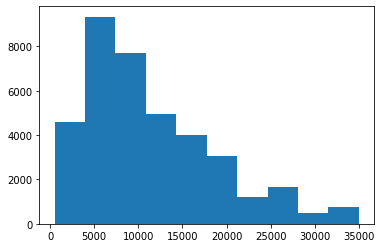

In [50]:
plt.hist(df.loan_amnt)

As we can see that maximum spread of the plot is between **Rs.5000-Rs.17000**

In [51]:
len(df[df.loan_amnt.isin(range(5000,17000))])*100/len(df)

61.55495552731893

From the above plot we can conclude that **61.5%** of the `loan amount` is between **Rs.5000 to Rs.17000**

(array([4329., 5094., 6821., 6974., 6285., 4437., 2235., 1060.,  464.,
          77.]),
 array([ 5.42 ,  7.337,  9.254, 11.171, 13.088, 15.005, 16.922, 18.839,
        20.756, 22.673, 24.59 ]),
 <a list of 10 Patch objects>)

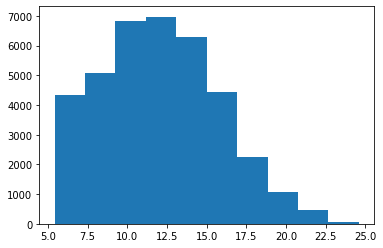

In [52]:
plt.hist(df.int_rate)

Maximum spread of the plot is **7.5-15.0**

(array([ 6996., 11171.,  8913.,  4986.,  2556.,  1465.,  1252.,   229.,
          136.,    72.]),
 array([  16.08 ,  144.991,  273.902,  402.813,  531.724,  660.635,
         789.546,  918.457, 1047.368, 1176.279, 1305.19 ]),
 <a list of 10 Patch objects>)

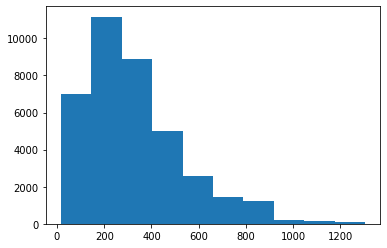

In [53]:
plt.hist(df.installment)

Most of the installments is between Rs.200-Rs.400

(array([2.2000e+01, 4.9600e+02, 5.6610e+03, 1.9181e+04, 1.0974e+04,
        1.2970e+03, 1.0600e+02, 3.4000e+01, 3.0000e+00, 2.0000e+00]),
 array([ 8.29404964,  9.02537168,  9.75669372, 10.48801576, 11.21933779,
        11.95065983, 12.68198187, 13.41330391, 14.14462595, 14.87594799,
        15.60727003]),
 <a list of 10 Patch objects>)

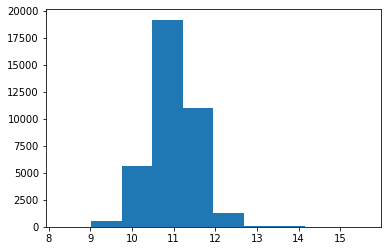

In [54]:
plt.hist(np.log(df.annual_inc))

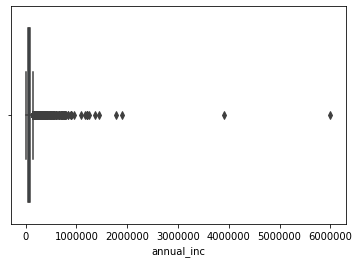

In [55]:
sns.boxplot(df.annual_inc)

**There are only `2` loans applicants having income more than `30 lakhs`**

(array([2582., 3467., 4629., 5378., 5818., 5366., 4861., 3954., 1391.,
         330.]),
 array([ 0.   ,  2.999,  5.998,  8.997, 11.996, 14.995, 17.994, 20.993,
        23.992, 26.991, 29.99 ]),
 <a list of 10 Patch objects>)

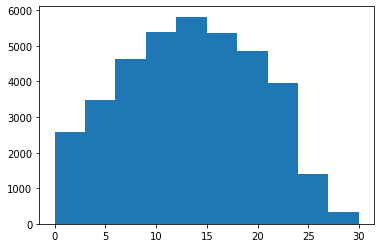

In [56]:
plt.hist(df.dti)

Most spread of the dti through the dataset is **7-23**

(array([26432.,  7724.,  2011.,   746.,   355.,   208.,   129.,    82.,
           54.,    35.]),
 array([     0. ,  14958.8,  29917.6,  44876.4,  59835.2,  74794. ,
         89752.8, 104711.6, 119670.4, 134629.2, 149588. ]),
 <a list of 10 Patch objects>)

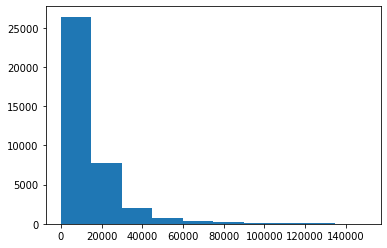

In [57]:
plt.hist(df.revol_bal)

(array([4161., 3192., 3625., 3906., 4128., 4136., 4102., 3877., 3571.,
        3078.]),
 array([ 0.  ,  9.99, 19.98, 29.97, 39.96, 49.95, 59.94, 69.93, 79.92,
        89.91, 99.9 ]),
 <a list of 10 Patch objects>)

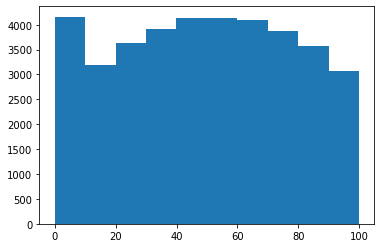

In [58]:
plt.hist(df.revol_util)

From the above plot clearly we can say that `revol_util` is approximately spread evenly throughout the dataset

(array([10149., 11775.,  7375.,  3901.,  2309.,  1245.,   552.,   302.,
          135.,    33.]),
 array([3.37300000e+01, 5.88672499e+03, 1.17397200e+04, 1.75927150e+04,
        2.34457100e+04, 2.92987050e+04, 3.51517000e+04, 4.10046950e+04,
        4.68576899e+04, 5.27106849e+04, 5.85636799e+04]),
 <a list of 10 Patch objects>)

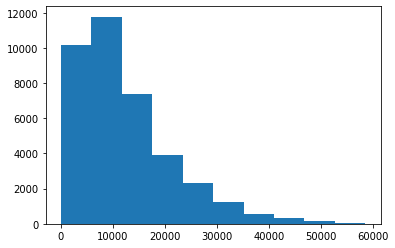

In [59]:
plt.hist(df.total_pymnt)

Spread of `Total Payment` is **Rs. 0-Rs. 170000**

In [60]:
len(df[df.total_pymnt<=10000])/len(df)

0.49669102075391786

Around 50% of the dataset is having **less than Rs.10000** in the `total_paymnt` column

(array([10865., 11796.,  7213.,  3690.,  2152.,  1106.,   541.,   281.,
          108.,    24.]),
 array([    0.   ,  5856.368, 11712.736, 17569.104, 23425.472, 29281.84 ,
        35138.208, 40994.576, 46850.944, 52707.312, 58563.68 ]),
 <a list of 10 Patch objects>)

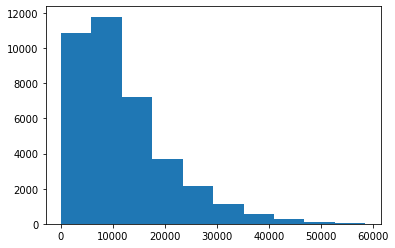

In [61]:
plt.hist(df.total_pymnt_inv)

(array([2.6006e+04, 6.9990e+03, 2.5250e+03, 1.1460e+03, 5.4900e+02,
        3.0100e+02, 1.1800e+02, 7.0000e+01, 4.2000e+01, 2.0000e+01]),
 array([6.2200000e+00, 2.3619660e+03, 4.7177120e+03, 7.0734580e+03,
        9.4292040e+03, 1.1784950e+04, 1.4140696e+04, 1.6496442e+04,
        1.8852188e+04, 2.1207934e+04, 2.3563680e+04]),
 <a list of 10 Patch objects>)

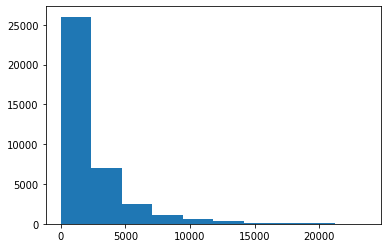

In [62]:
plt.hist(df.total_rec_int)

Most of the values are lying less than **Rs.5000** in the `total_rec_int`

In [63]:
len(df[df.total_rec_int<5000])/len(df)

0.8849269377382465

**88%** of the values are **less than Rs.5000** in the `total_rec_int`

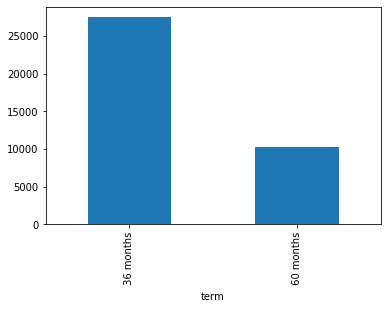

In [64]:
df.groupby(df.term).loan_amnt.count().plot.bar()

Most of the loans are having **36 month** as the `term`

In [65]:
df.groupby('term')['loan_amnt'].count().values[0]/len(df)

0.7268106734434562

Around **73%** of the loans are having **36 months** as a `term`

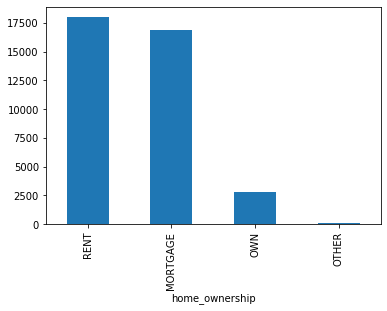

In [66]:
df.groupby(df.home_ownership).loan_amnt.count().sort_values(ascending=False).plot.bar()

A **Majority** of of the having `Rent` and `Mortgage` as there `Home Ownership`

In [67]:
len(df[df.home_ownership.isin(['RENT','MORTGAGE'])])*100/len(df)

92.43434985175773

From the above cells we can conclude that the dataset having `home_ownership` column have **92.4%** values are lying between `RENT` and `MORTGAGE`

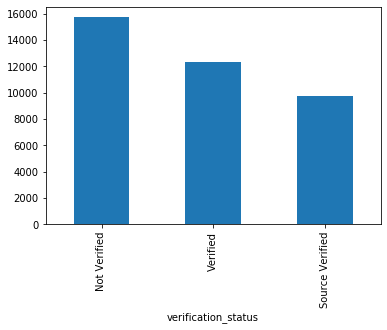

In [68]:
df.groupby(df.verification_status).loan_amnt.count().sort_values(ascending=False).plot.bar()

There are **more number of Not Verified loans** are there but in **reality there should be less number of Not Verified loans should be, so as to minimise number of default loan**

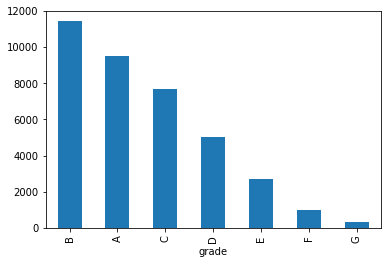

In [69]:
df.groupby(df.grade).loan_amnt.count().sort_values(ascending=False).plot.bar()

There are **majority** of the loans are having **higher grade throughout the dataset**

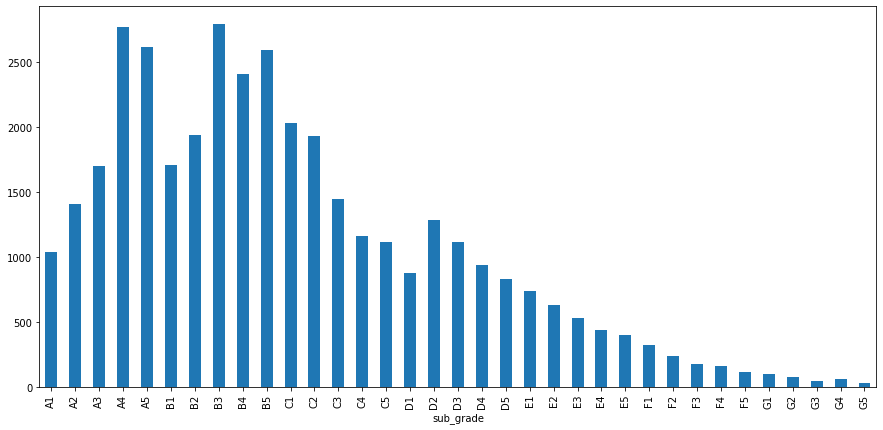

In [70]:
plt.figure(figsize=(15,7))
df.groupby(df.sub_grade).loan_amnt.count().plot.bar()

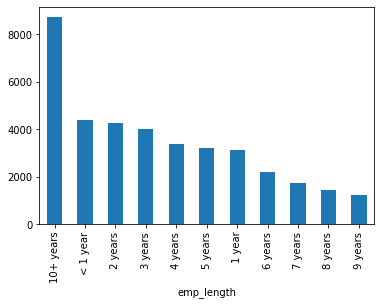

In [71]:
df.groupby(df.emp_length).loan_amnt.count().sort_values(ascending=False).plot.bar()

More loans are having **10+ years** as their `employee length `, after that all the other are having same spread

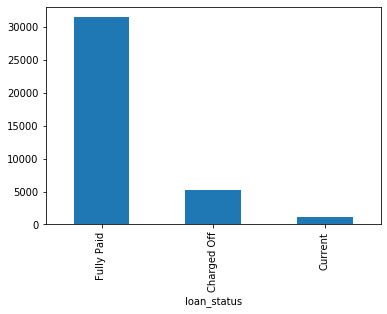

In [72]:
df.groupby(df.loan_status).loan_amnt.count().sort_values(ascending=False).plot.bar()

There are **more of fully paid** are loans are there but there are **good amount of charged off** loans are also there

In [73]:
round(len(df[df.loan_status=="Charged Off"])*100/len(df),2)

13.75

**Overall Default Rate is 13.75%(approx) throughout the dataset**

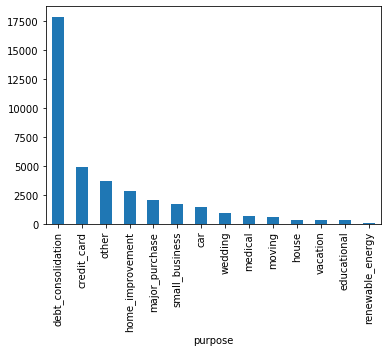

In [74]:
df.groupby(df.purpose).loan_amnt.count().sort_values(ascending=False).plot.bar()

More number of the loans are having **debt consolidation** as their `purpose` in the dataset, it is most common purpose thoroughout the dataset

In [75]:
len(df[df.purpose=="debt_consolidation"])*100/len(df)

47.37134688691233

**Almost 47.5%** of the data is having **debt consolidation** as their `purpose`

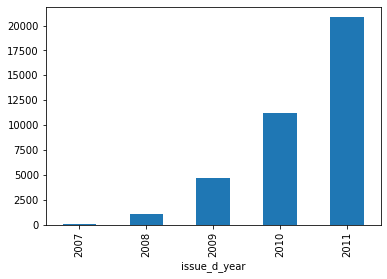

In [76]:
df.groupby(df.issue_d_year).loan_amnt.count().plot.bar()

**Over the years there is a huge increase in number of loans approved**

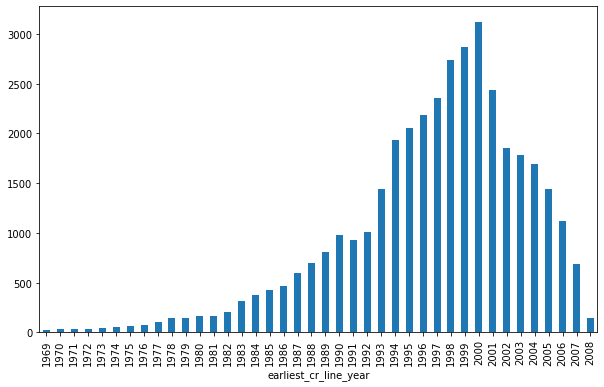

In [77]:
plt.figure(figsize=(10,6))
df.groupby(df.earliest_cr_line_year).loan_amnt.count().plot.bar()

Over the years graph of `earliest_cr_line` had been **increasing** but after the **specific year it is decreasing over course of the time**

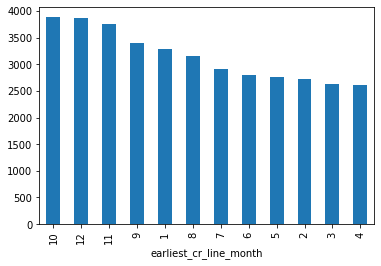

In [78]:
df.groupby(df.earliest_cr_line_month).loan_amnt.count().sort_values(ascending=False).plot.bar()

From the above plot we can say that **significantly more loans** of `earliest_cr_line` are **at the end of the year or at the starting of the year**

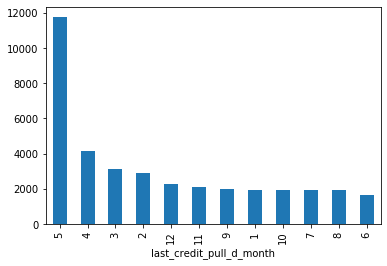

In [79]:
df.groupby(df.last_credit_pull_d_month).loan_amnt.count().sort_values(ascending=False).plot.bar()

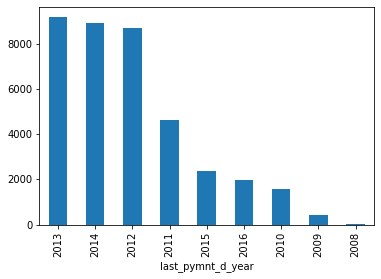

In [80]:
df.groupby(df.last_pymnt_d_year).loan_amnt.count().sort_values(ascending=False).plot.bar()

From the above plot it is visible that maximum spread of the `last payment` dates are during **2012-2014** period.

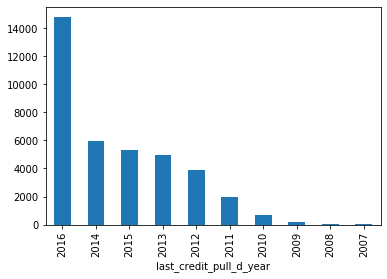

In [81]:
df.groupby(df.last_credit_pull_d_year).loan_amnt.count().sort_values(ascending=False).plot.bar()

## Segmented Analysis

Let's take `term` as our 1st segment and plot around all the numeric columns present to us

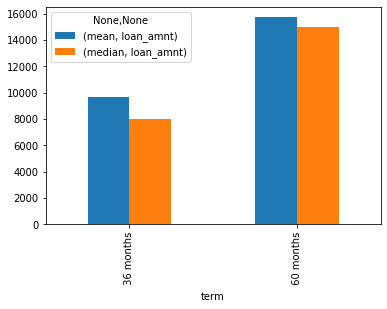

In [82]:
pd.pivot_table(df,index=["term"],values=["loan_amnt"],aggfunc=["mean","median"]).plot.bar()

From the above table one thing is clear **mean and median are showing almost same values** which means there are **less outliers** are there in the dataset

Loans having **60 months** as their term period are getting **more loan amount** as compare to **36 months**

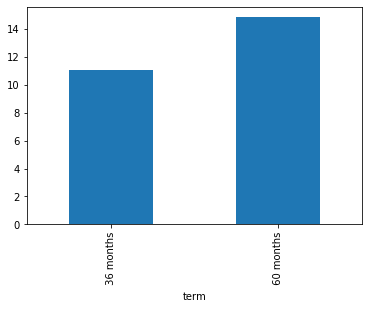

In [83]:
df.groupby(df.term).int_rate.mean().plot.bar()

`Interest Rate` are higher for **60 months term period loans**

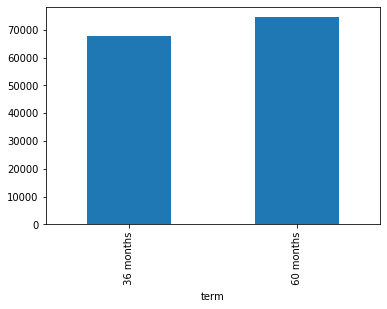

In [84]:
df.groupby(df.term).annual_inc.mean().plot.bar()

`Annual Income` of the **60 months** are **comparatively high** as compare to **36 months**

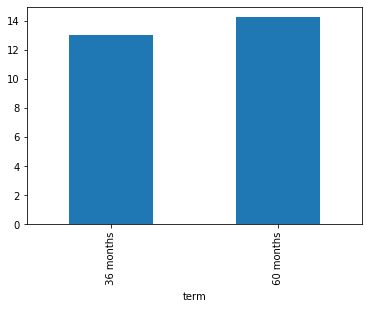

In [85]:
df.groupby(df.term).dti.mean().plot.bar()

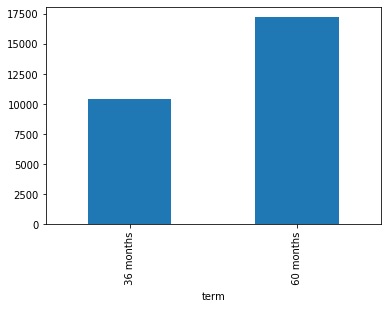

In [86]:
df.groupby(df.term).total_pymnt.mean().plot.bar()

`Total Payment` of the **60 months is higher than 36 months**

`Let's make a list in which emp_length is ordered condition and can be used where we need that`

In [87]:
lst=sorted(list(df.emp_length.value_counts().index))

In [88]:
lst[0]=lst[-1]
lst[-1]=lst[1]
lst[1]='1 year'

In [89]:
lst

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

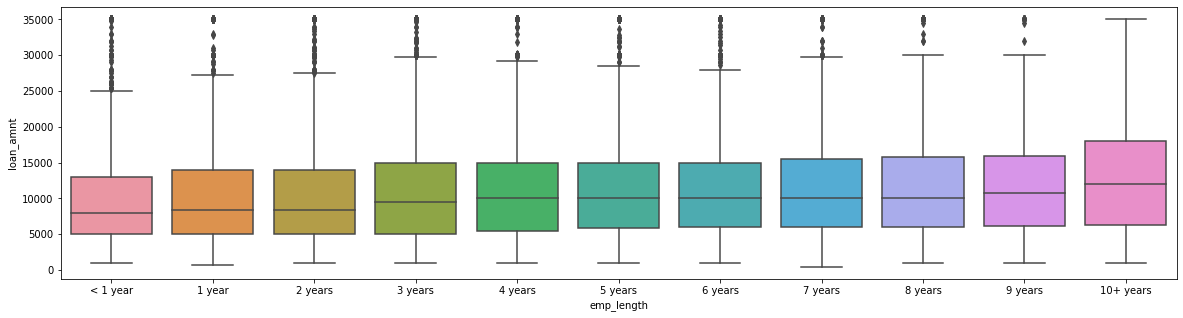

In [90]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df.emp_length,y=df.loan_amnt,order=lst)

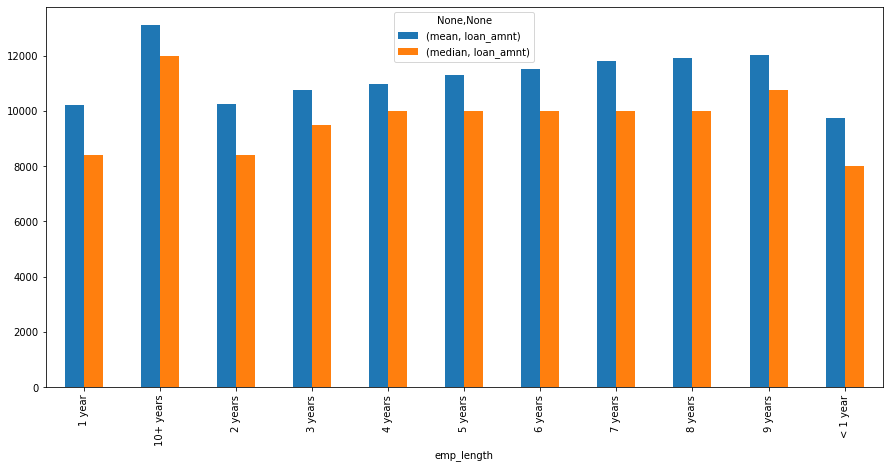

In [91]:
pd.pivot_table(df,index=["emp_length"],values=["loan_amnt"],aggfunc=["mean","median"]).plot.bar(figsize=(15,7))

From the above plot we say that **higher we go in emp_length higher more will be the loan amount**.<br>
In `loan amount` is **directy proportional** to `emp_length`.

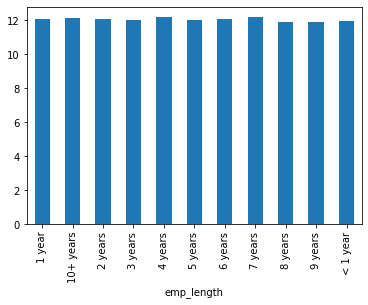

In [92]:
df.groupby(df.emp_length).int_rate.mean().plot.bar()

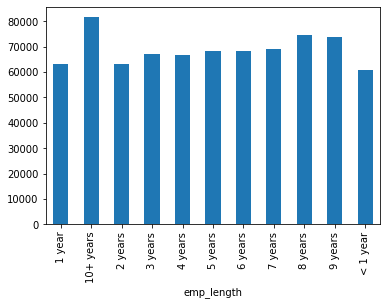

In [93]:
df.groupby(df.emp_length).annual_inc.mean().plot.bar()

Over `annual income` is **increasing** over the course of the `emp_length`

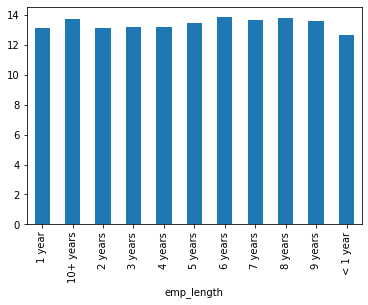

In [94]:
df.groupby(df.emp_length).dti.mean().plot.bar()

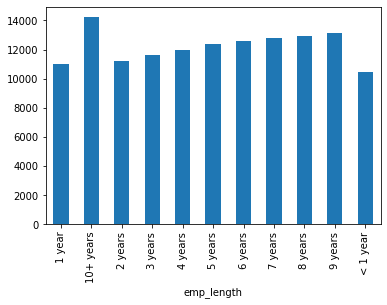

In [95]:
df.groupby(df.emp_length).total_pymnt.mean().plot.bar()

`Total Payment` is also **increasing over** course of the `emp_length`

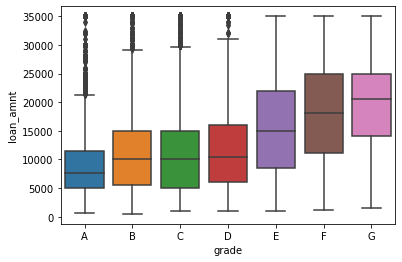

In [96]:
sns.boxplot(y=df.loan_amnt,x=df.grade,order=["A","B","C","D","E","F","G"])

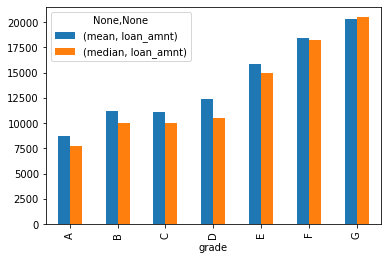

In [97]:
pd.pivot_table(df,index=["grade"],values=["loan_amnt"],aggfunc=["mean","median"]).plot.bar()

As the `grade` **decreases** more will be `loan amount`

**From the above plots we can see that big loans are generally given to the lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan**

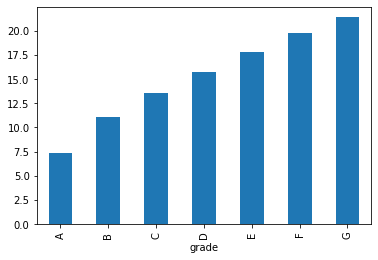

In [98]:
df.groupby(df.grade).int_rate.mean().plot.bar()

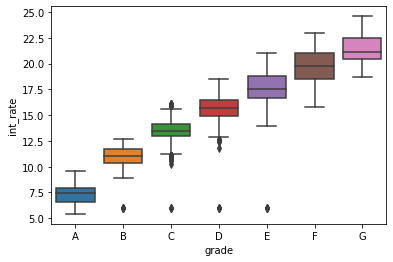

In [99]:
sns.boxplot(y=df.int_rate,x=df.grade,order=["A","B","C","D","E","F","G"])

This is same as `loan amount` as `grade` **decreases** `int_rate` is also **increasing**

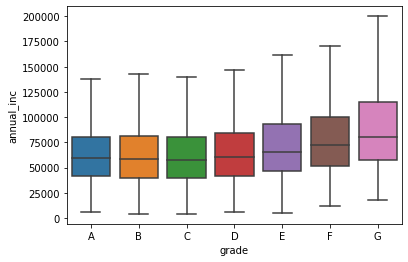

In [100]:
sns.boxplot(y=df.annual_inc,x=df.grade,order=["A","B","C","D","E","F","G"],showfliers=False)

It is showing the **same trend as loan amount plots were**, as **`grade` decreases `annual income` increases**

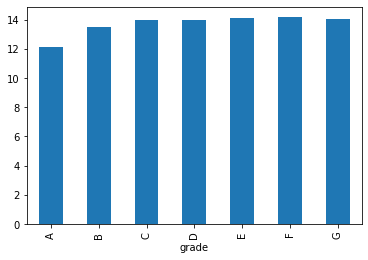

In [101]:
df.groupby(df.grade).dti.mean().plot.bar()

**Expect `grade A` rest all the `grades` are approximately same `dti` values**

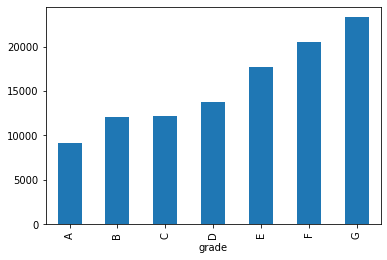

In [102]:
df.groupby(df.grade).total_pymnt.mean().plot.bar()

Above all the plots of the `grade` depict **same trend** as `grade` **decreases rest everything automatically increases**

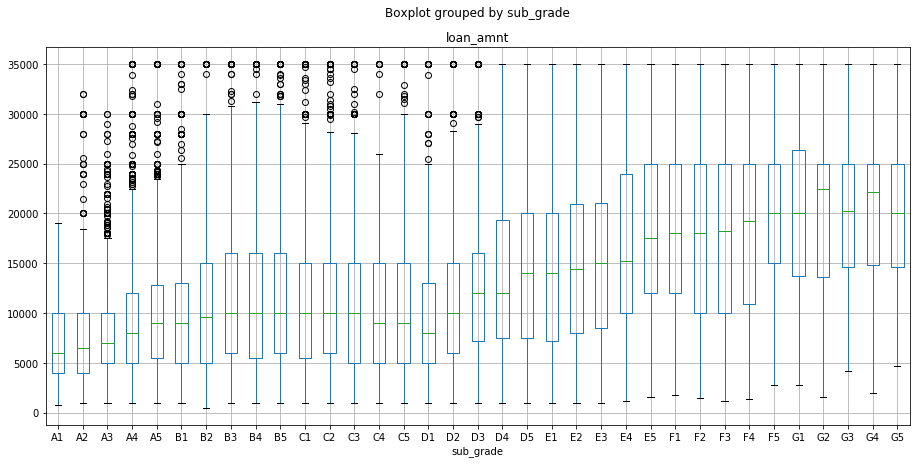

In [103]:
df.boxplot(column='loan_amnt', by='sub_grade',figsize=(15,7))

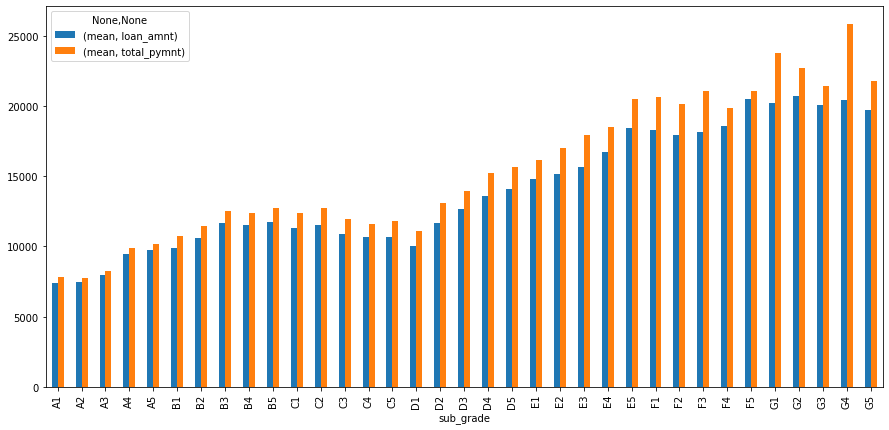

In [104]:
pd.pivot_table(df,index=["sub_grade"],values=["loan_amnt","total_pymnt"],aggfunc=["mean"]).plot.bar(figsize=(15,7))

As the **grade increases difference between total paymnt and loan amount also increases** and **loan amount is also increasing over the grade**

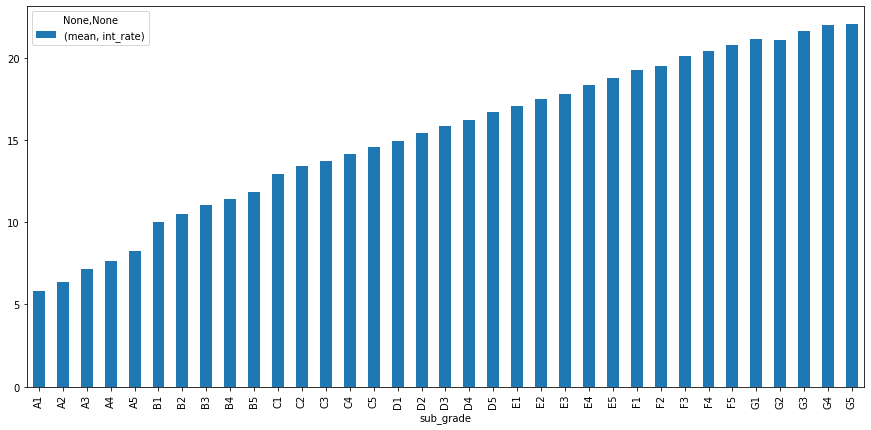

In [105]:
pd.pivot_table(df,index=["sub_grade"],values=["int_rate"],aggfunc=["mean"]).plot.bar(figsize=(15,7))

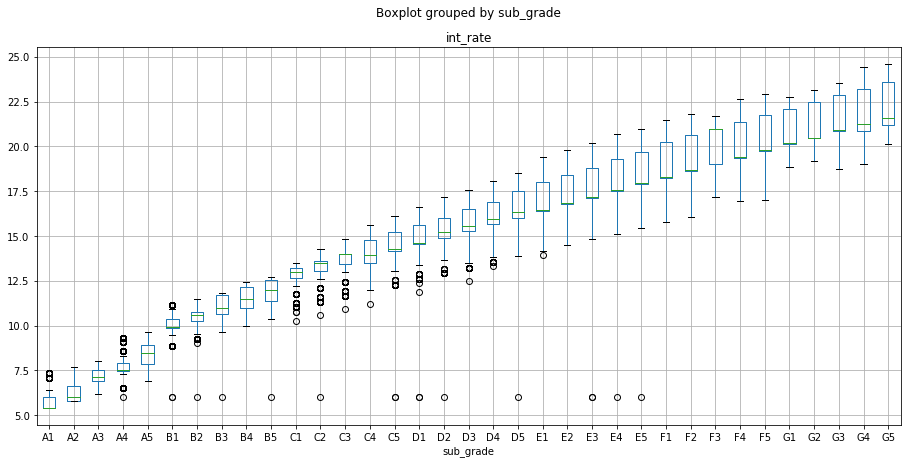

In [106]:
df.boxplot(column='int_rate', by='sub_grade',figsize=(15,7))

`Interest Rate` is **increasing tremendously** as we move forward in `grade`

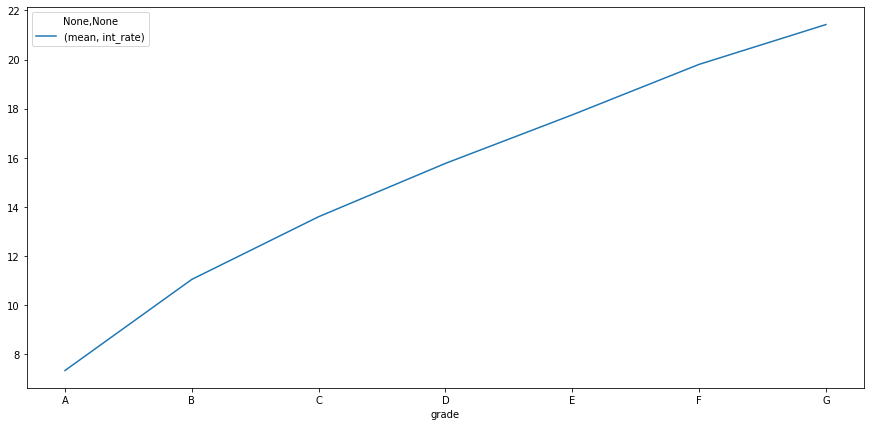

In [107]:
pd.pivot_table(df,index=["grade"],values=["int_rate"],aggfunc=["mean"]).plot.line(figsize=(15,7))

**It is forming a straight line on `grade` as `grade` decreases more will be the `int_rate`. It will happen because `loan amount` is also increasing so in that case risk increases and because of that `int_rate` increases**

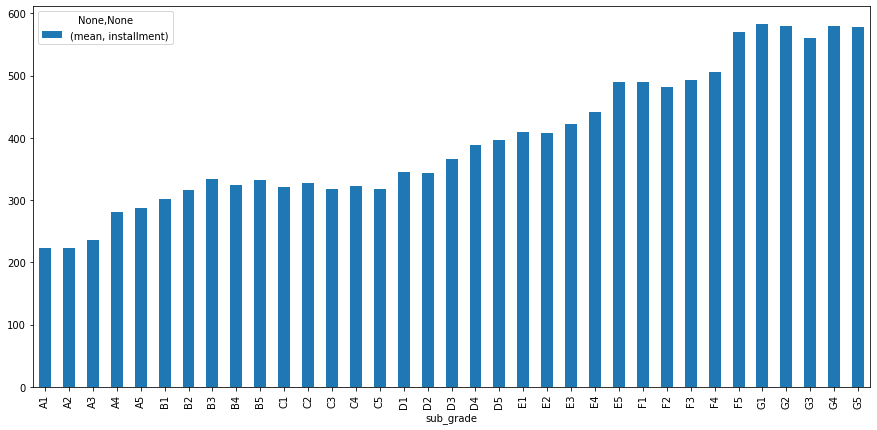

In [108]:
pd.pivot_table(df,index=["sub_grade"],values=["installment"],aggfunc=["mean"]).plot.bar(figsize=(15,7))

`Installment` is also **increasing** as we move forward in `grade` but at some point there is a **small dip** in `installment` which is not following the **same trend which all other sub_grade is following** in the above plot

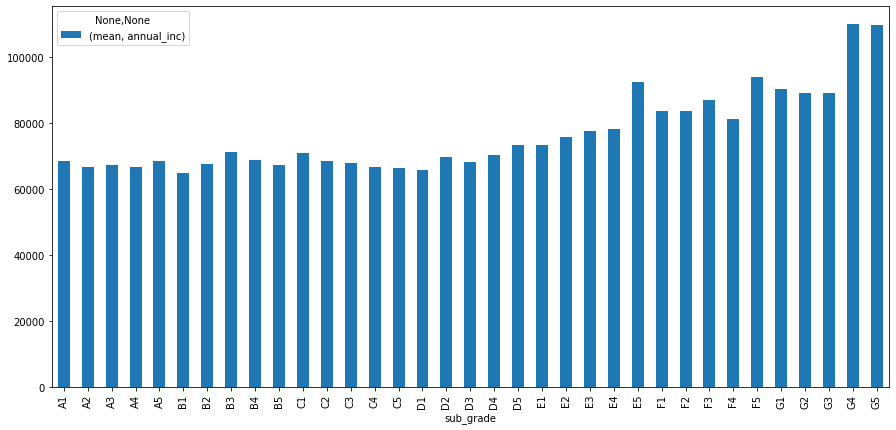

In [109]:
pd.pivot_table(df,index=["sub_grade"],values=["annual_inc"],aggfunc=["mean"]).plot.bar(figsize=(15,7))

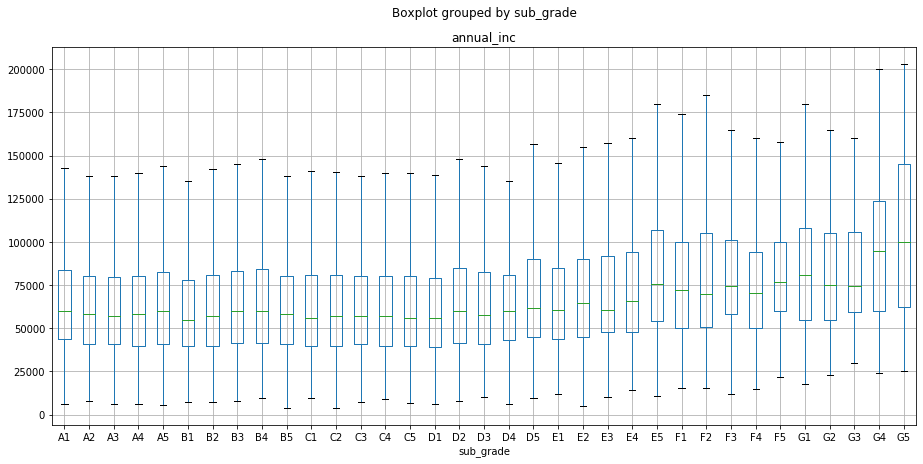

In [110]:
df.boxplot(column='annual_inc', by='sub_grade',figsize=(15,7),showfliers=False)

There is **no trend** in the `annual income`, mostly it is spread in a **equal fashion** but at **some point it is rising** after that eventually **it is coming to the similar fashion as earlier spotted**

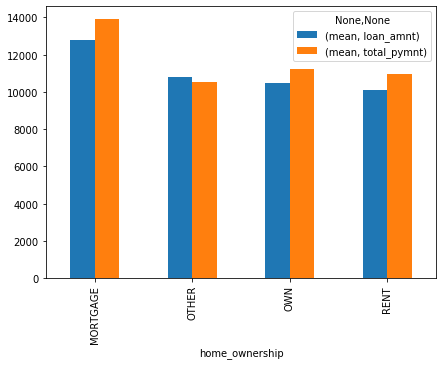

In [111]:
pd.pivot_table(df,index=["home_ownership"],values=["loan_amnt","total_pymnt"],aggfunc=["mean"]).plot.bar(figsize=(7,5))

More `loan amount` is been achieved by **Mortgage**, it can be because they are **depositing more `total payment` than others**

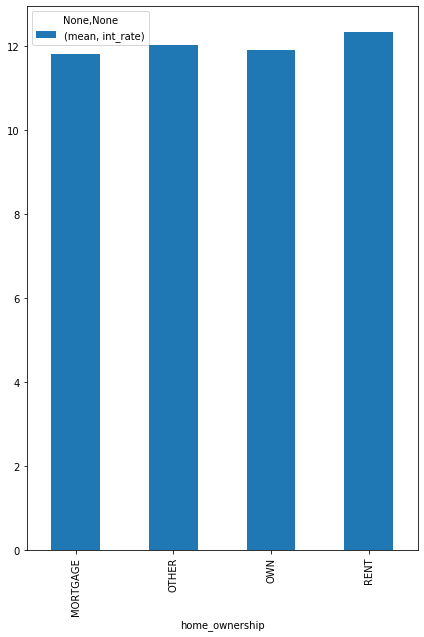

In [112]:
pd.pivot_table(df,index=["home_ownership"],values=["int_rate"],aggfunc=["mean"]).plot.bar(figsize=(7,10))

Almost everyone is hving same `int_rate` but loans having **Rent** loans are paying little more `int_rate`

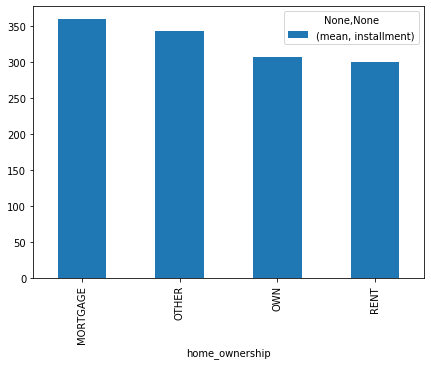

In [113]:
pd.pivot_table(df,index=["home_ownership"],values=["installment"],aggfunc=["mean"]).plot.bar(figsize=(7,5))

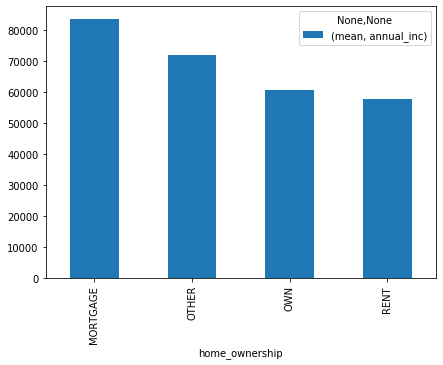

In [114]:
pd.pivot_table(df,index=["home_ownership"],values=["annual_inc"],aggfunc=["mean"]).plot.bar(figsize=(7,5))

Both `installment` and `annual income` is showing same trend throughout the dataset

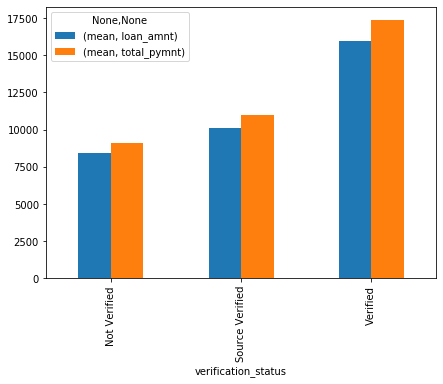

In [115]:
pd.pivot_table(df,index=["verification_status"],values=["loan_amnt","total_pymnt"],aggfunc=["mean"]).plot.bar(figsize=(7,5))

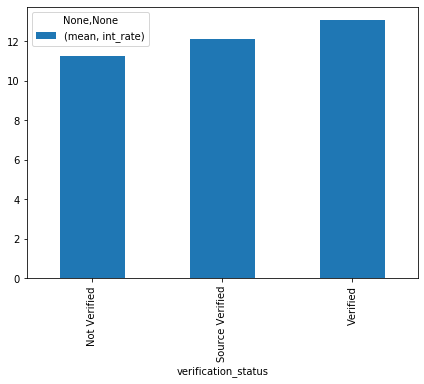

In [116]:
pd.pivot_table(df,index=["verification_status"],values=["int_rate"],aggfunc=["mean"]).plot.bar(figsize=(7,5))

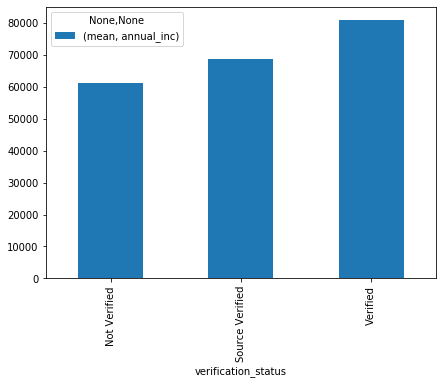

In [117]:
pd.pivot_table(df,index=["verification_status"],values=["annual_inc"],aggfunc=["mean"]).plot.bar(figsize=(7,5))

In the `verification status` segmentation all the **graphs are showing same trend thrughout the dataset**

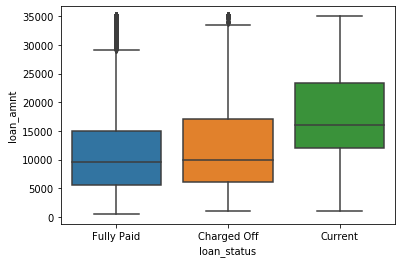

In [118]:
sns.boxplot(x=df.loan_status,y=df.loan_amnt)

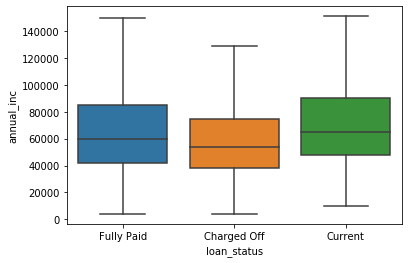

In [119]:
sns.boxplot(x=df.loan_status,y=df.annual_inc,showfliers=False)

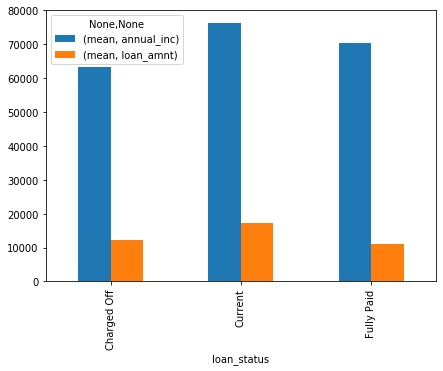

In [120]:
pd.pivot_table(df,index=["loan_status"],values=["loan_amnt","annual_inc"],aggfunc=["mean"]).plot.bar(figsize=(7,5))

People with `Charged Off` are **getting more loan amount as comapare to `Fully Paid` loans** and `Charged Off` loans are having **less annual income** also as compare to `Fully Paid loans`

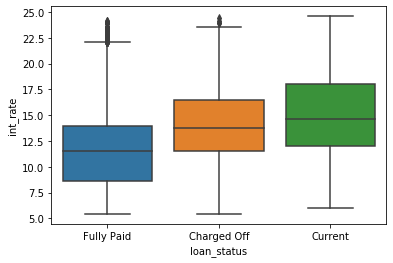

In [121]:
sns.boxplot(x=df.loan_status,y=df.int_rate)

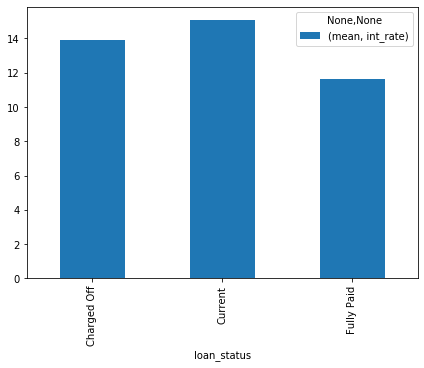

In [122]:
pd.pivot_table(df,index=["loan_status"],values=["int_rate"],aggfunc=["mean"]).plot.bar(figsize=(7,5))

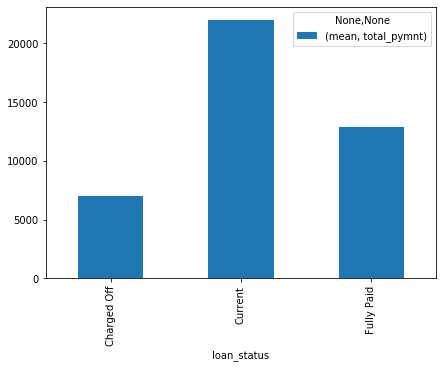

In [123]:
pd.pivot_table(df,index=["loan_status"],values=["total_pymnt"],aggfunc=["mean"]).plot.bar(figsize=(7,5))

People with less `total payment` are **likely to come** in `Charged Off` category

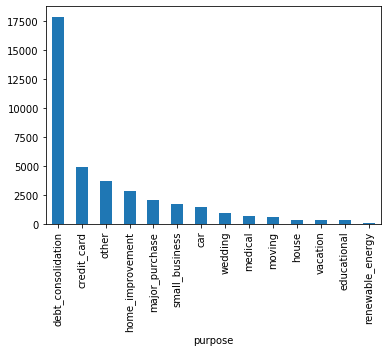

In [124]:
df.groupby(df.purpose).loan_amnt.count().sort_values(ascending=False).plot.bar()

**Maximum number of the loans are granted were for Debt Consolidation**

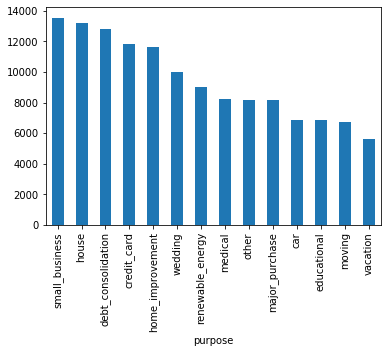

In [125]:
df.groupby(df.purpose).loan_amnt.mean().sort_values(ascending=False).plot.bar()

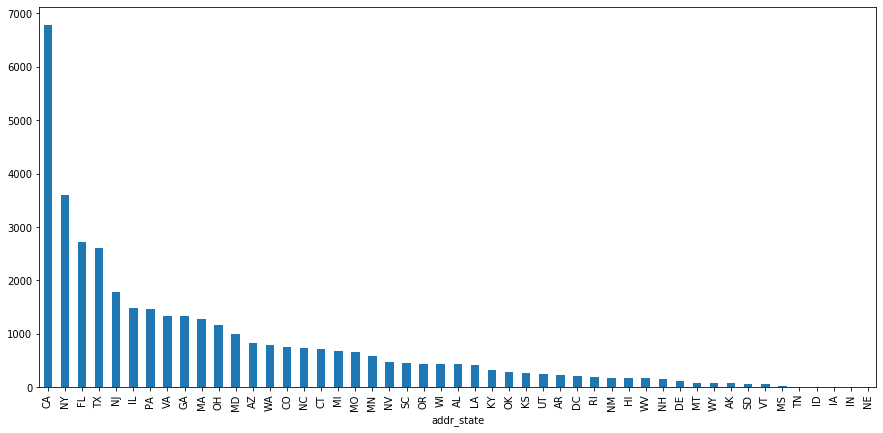

In [126]:
plt.figure(figsize=(15,7))
df.groupby(df.addr_state).loan_amnt.count().sort_values(ascending=False).plot.bar()

`Most of the loan applicants are from the state Carlifornia`

### Computing Variation Across a Category and Analysing multiple categories at once

`Here we are making a new variable lst1 which is a list in which it contains all the columns of the dataset which has object as their datatype`

In [127]:
lst1=list(df.select_dtypes(include="O").columns)

In [128]:
lst1

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state']

We will be removing few columns which is not nescessary to us because few are of date columns

In [129]:
lst1=lst1[:-3]

In [130]:
lst1.pop(-3)

'emp_length'

In [131]:
lst1

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status']

`Here we are making a new variable num_lst which is a list in which it contains all the columns of the dataset which has int64 and float as their datatype`

In [132]:
num_lst=list(df.select_dtypes(include=["int64","float"]).columns)

`We will be removing balance payment column because it has values in -ive no. due to which it will affect our heatmap and month and year containing columns having int and float as datatypes`

In [133]:
num_lst=num_lst[:-9]

In [134]:
num_lst

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'pub_rec_bankruptcies']

In [135]:
def compute_perc_change(col,df):
    groupby_df=df.groupby(col)[num_lst].agg("mean")
    max_marks=groupby_df.max(axis=0)
    min_marks=groupby_df.min(axis=0)    
    perc_change=round((max_marks-min_marks)/max_marks*100,2)
    return_df=pd.DataFrame(data=perc_change.values.reshape(1,-1),columns=num_lst,index=[col])
    return return_df

In [136]:
final_df=pd.DataFrame()
for col in lst1:
    col_df=compute_perc_change(col,df)
    final_df=pd.concat([final_df,col_df],axis=0)

In [137]:
final_df

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
term,38.52,25.58,12.96,8.97,8.46,5.67,11.08,5.13,7.61,16.79,...,100.00,39.38,40.85,28.09,68.43,16.33,75.63,54.50,52.78,14.16
grade,56.99,65.72,54.99,29.10,14.50,89.30,37.36,14.27,84.63,44.78,...,97.88,60.89,60.33,45.96,88.83,88.64,95.84,95.11,67.40,82.91
sub_grade,64.39,73.67,61.73,40.93,32.27,96.79,72.79,34.43,98.54,63.14,...,100.00,69.95,68.34,58.72,93.26,95.19,99.10,99.54,76.25,100.00
home_ownership,21.02,4.13,16.37,30.81,15.61,58.49,29.70,17.97,65.88,40.85,...,100.00,24.24,42.06,21.94,35.63,69.68,34.13,45.74,45.26,57.12
verification_status,47.21,13.98,41.79,24.41,11.14,7.15,4.65,9.51,13.99,34.26,...,86.55,47.52,48.22,43.83,60.45,26.39,68.93,61.59,53.48,12.48


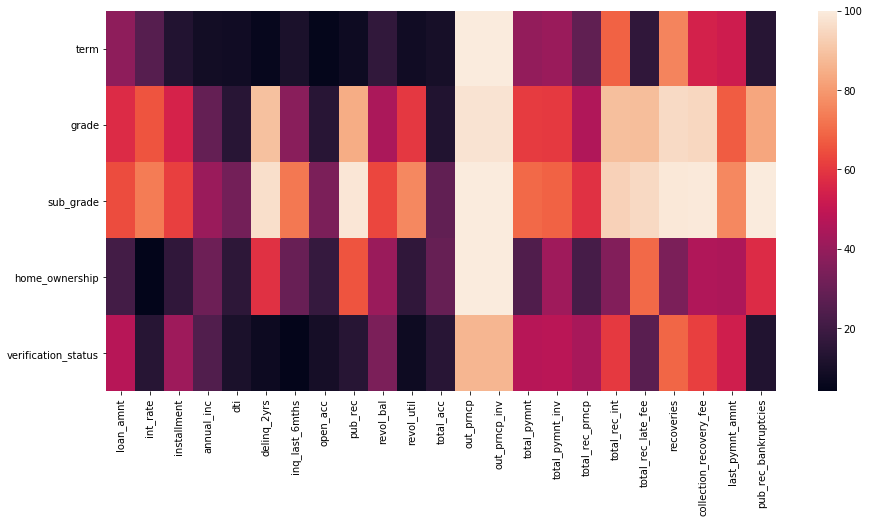

In [138]:
plt.figure(figsize=(15,7))
sns.heatmap(final_df)

### Comparison of Averages

In [139]:
def compute_perc_change_median(col,df):
    groupby_df=df.groupby(col)[num_lst].agg("median")
    max_marks=groupby_df.max(axis=0)
    min_marks=groupby_df.min(axis=0)    
    perc_change=round((max_marks-min_marks)/max_marks*100,2)
    return_df=pd.DataFrame(data=perc_change.values.reshape(1,-1),columns=num_lst,index=[col])
    return return_df

In [140]:
final_median_df=pd.DataFrame()
for col in lst1:
    col_df=compute_perc_change(col,df)
    final_median_df=pd.concat([final_median_df,col_df],axis=0)

In [141]:
final_median_df

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
term,38.52,25.58,12.96,8.97,8.46,5.67,11.08,5.13,7.61,16.79,...,100.00,39.38,40.85,28.09,68.43,16.33,75.63,54.50,52.78,14.16
grade,56.99,65.72,54.99,29.10,14.50,89.30,37.36,14.27,84.63,44.78,...,97.88,60.89,60.33,45.96,88.83,88.64,95.84,95.11,67.40,82.91
sub_grade,64.39,73.67,61.73,40.93,32.27,96.79,72.79,34.43,98.54,63.14,...,100.00,69.95,68.34,58.72,93.26,95.19,99.10,99.54,76.25,100.00
home_ownership,21.02,4.13,16.37,30.81,15.61,58.49,29.70,17.97,65.88,40.85,...,100.00,24.24,42.06,21.94,35.63,69.68,34.13,45.74,45.26,57.12
verification_status,47.21,13.98,41.79,24.41,11.14,7.15,4.65,9.51,13.99,34.26,...,86.55,47.52,48.22,43.83,60.45,26.39,68.93,61.59,53.48,12.48


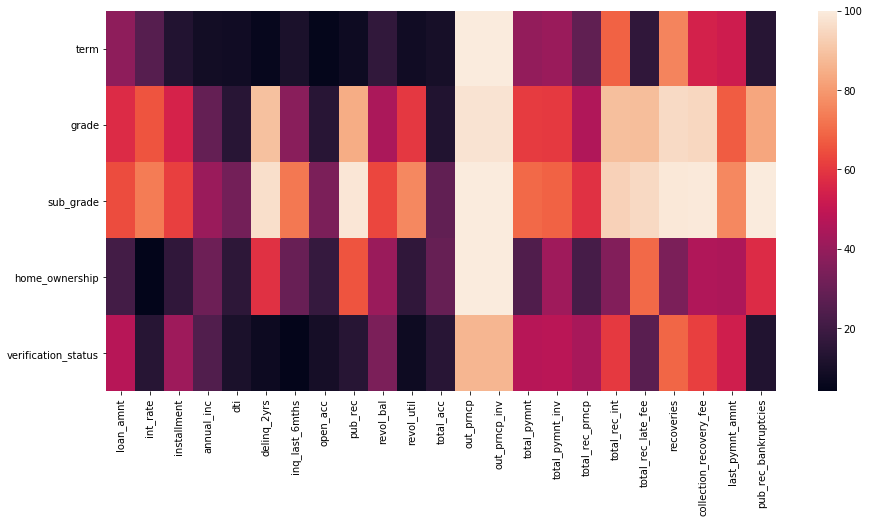

In [142]:
plt.figure(figsize=(15,7))
sns.heatmap(final_median_df)

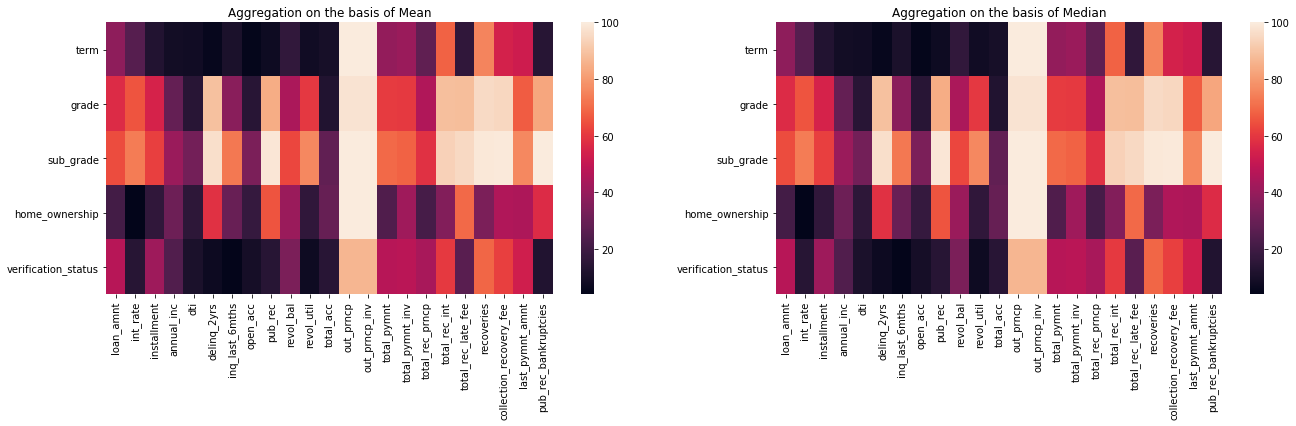

In [143]:
plt.figure(figsize=(22,5))
plt.figure(1)
plt.subplot(121)     
plt.title("Aggregation on the basis of Mean")
sns.heatmap(final_df)


plt.subplot(122)
plt.title("Aggregation on the basis of Median")
sns.heatmap(final_median_df)

**Checking if there outliers due to which heatmap is biased or not. For that we plotted heatmap of median across all the categories and compared with heatmap of mean aggregation but after analysing found there is no outliers in the dataset which is affecting the heatmap because both the heatmaps depict same results**

### As our prime objective to find default loans let's do analysis on loan status having default as a value copare with fully paid loans and find when there are chances loan will get defaulted

In [144]:
print(round(df.loc[df['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(df),2))

13.75


Around **13.75** of loans in the dataset are `defaulted`.

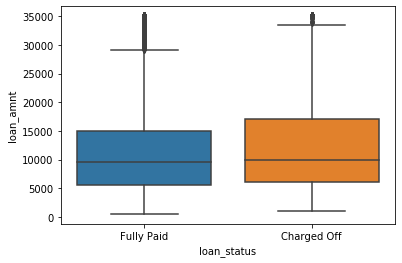

In [145]:
sns.boxplot(x=df[df.loan_status!="Current"].loan_status,y=df.loan_amnt)

In [146]:
df.groupby(df[df.loan_status!="Current"].loan_status)['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5193.0,12292.278067,8097.519952,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,31487.0,10962.334455,7220.587377,500.0,5487.5,9600.0,15000.0,35000.0


Overall, the applied loan amount distribution is slightly **right-skewed** with mean greater than the median.<br>
Currently `Charged Off` people are getting higher average loan as compare to other values

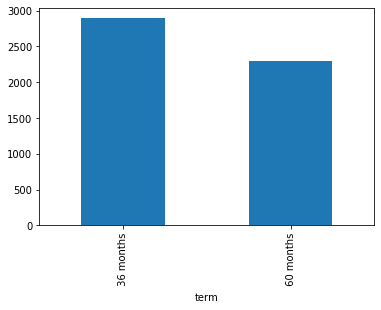

In [147]:
df.groupby(df[df.loan_status=="Charged Off"].term).loan_amnt.count().plot.bar()

From the plot we can conclude that people who are taking **36 months** as a term period is defaulting more in `Loan Status` having `Charged Off` value.

In [148]:
df.groupby(df[df.loan_status!="Current"].loan_status).int_rate.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5193.0,13.927333,3.658702,5.42,11.49,13.79,16.45,24.40
Fully Paid,31487.0,11.659506,3.608375,5.42,8.59,11.49,13.99,24.11


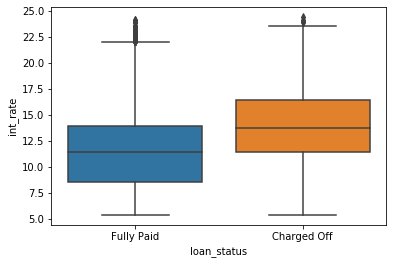

In [149]:
sns.boxplot(x=df[df.loan_status!="Current"].loan_status,y=df.int_rate)

The intrest rate for **Charged Off** loans appear to be **higher** than for **Fully paid**. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases.

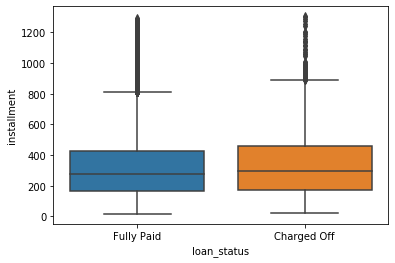

In [150]:
sns.boxplot(x=df[df.loan_status!="Current"].loan_status,y=df.installment)

Loans Charged Off have **approximately same installment on average**

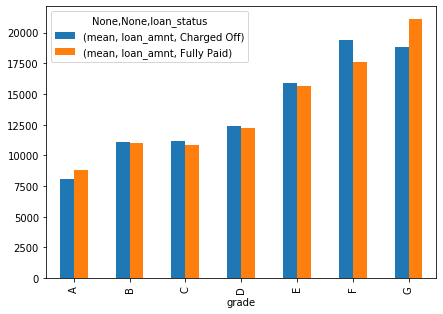

In [151]:
pd.pivot_table(df,index=["grade"],columns=[df[df.loan_status!="Current"].loan_status],values=["loan_amnt"],aggfunc=["mean"]).plot.bar(figsize=(7,5))

<Figure size 1224x432 with 0 Axes>

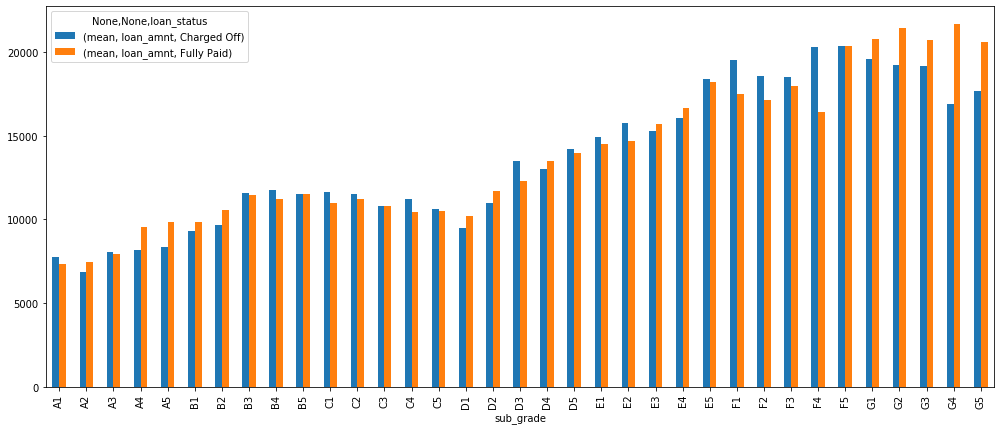

In [152]:
plt.figure(figsize=(17,6))
pd.pivot_table(df,index=["sub_grade"],columns=[df[df.loan_status!="Current"].loan_status],values=["loan_amnt"],aggfunc=["mean"]).plot.bar(figsize=(17,7))

As we see both the plots we can see that as we move forward in `sub_grade` we can found that **loan_amnt is increasing is slowly and after a **certain point `loan_amnt` for defaut loans starts decreasing also as we compare to fully paid loans**

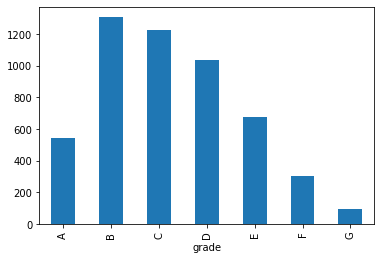

In [153]:
df.groupby(df[df.loan_status=="Charged Off"].grade).loan_amnt.count().plot.bar()

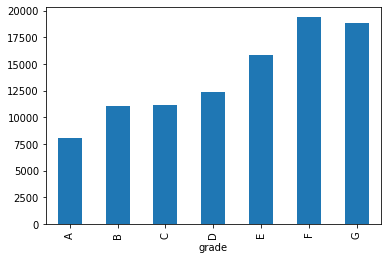

In [154]:
df.groupby(df[df.loan_status=="Charged Off"].grade).loan_amnt.mean().plot.bar()

**Grade A,B,C** loans are **safe**. As there is maximum of loan amount has been recovered who are charged off as compare to other values <br> 
**Grade D,E,F,G** loans are **less safe**

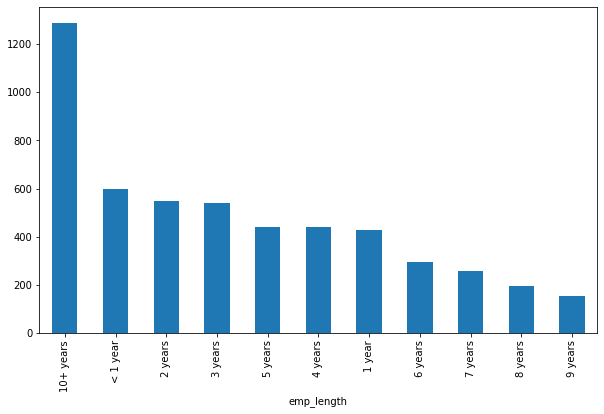

In [155]:
plt.figure(figsize=(10,6))
df.groupby(df[df.loan_status=="Charged Off"].emp_length).loan_amnt.count().sort_values(ascending=False).plot.bar()

Expection loans with **10+ years as Employeement Length** is much **greater to default** as **compare to other values**<br>
**As rest every value is almost following same trend as less employement length more loans will be defaulted**

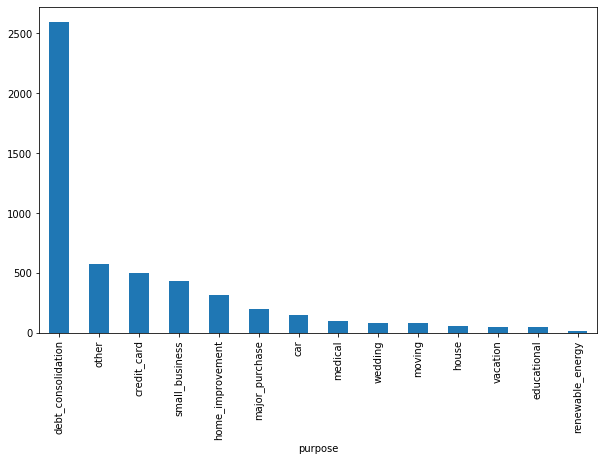

In [156]:
plt.figure(figsize=(10,6))
df.groupby(df[df.loan_status=="Charged Off"].purpose).loan_amnt.count().sort_values(ascending=False).plot.bar()

**We can see from the above plot that there are few risky purposes are their in which if company invest money they can have loss, so to reduce also we can give less loan amount to these loans and loans having debt_consolidations as their purpose more to default**

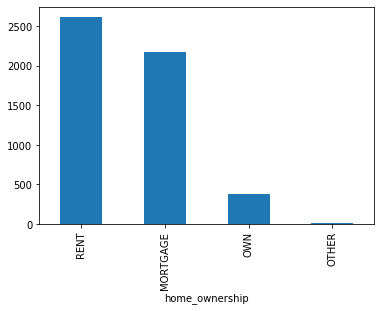

In [157]:
df.groupby(df[df.loan_status=="Charged Off"].home_ownership).loan_amnt.count().sort_values(ascending=False).plot.bar()

**People having `Rent` are more to `default` in loans as compare to other values but not to forget `Mortgage` also as it also having high amount of `default` loans as compare to other 2 values present in the column**

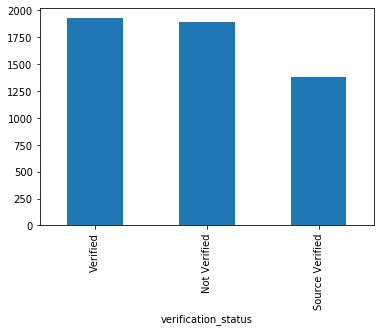

In [158]:
df.groupby(df[df.loan_status=="Charged Off"].verification_status).loan_amnt.count().sort_values(ascending=False).plot.bar()

As expected `Not-Verified` loans are having **almost high default loans, so to reduce losses company should try to reduce `Not-Verified loans` or reduce the loan amount of `Not-Verified loans`**<br>
Interestingly `Verified` people are too on the **top** of `Charged Off` plot other than `Non-Verified` people

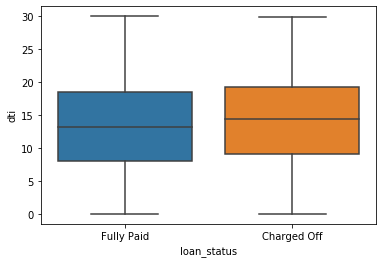

In [159]:
sns.boxplot(x=df[df.loan_status!="Current"].loan_status,y=df.dti)

**Higher the `dti` higher the chances of loan being `Charged Off`**

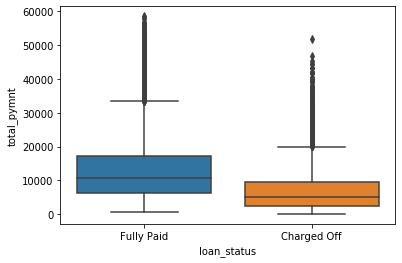

In [160]:
sns.boxplot(x=df[df.loan_status!="Current"].loan_status,y=df.total_pymnt)

If we see in the above plot that the **average payment** received to date for the `Charged Off` loan is comparatively less than `Fully Paid` loans.

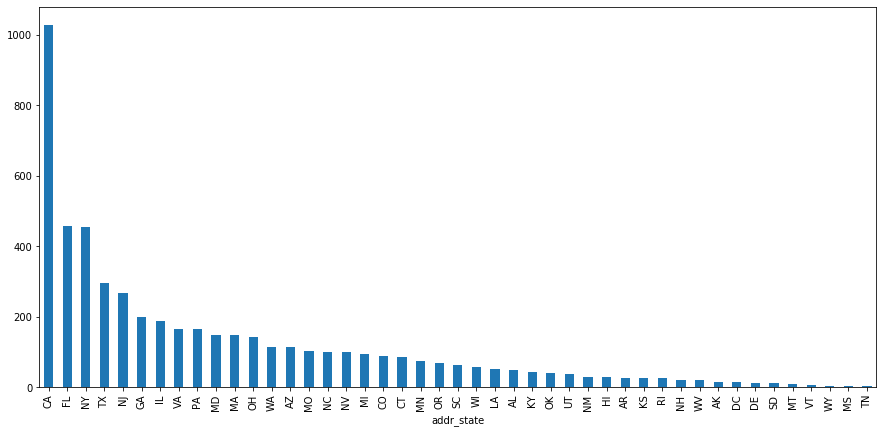

In [161]:
plt.figure(figsize=(15,7))
df.groupby(df[df.loan_status=="Charged Off"].addr_state).loan_amnt.count().sort_values(ascending=False).plot.bar()

**Most of the defaulters are also from the state `Carlifornia`**

## Bivariate Analysis

**In loan 2 things are important:**<br>
1. `Loan Amount`<br>
2. `Term of the Loan`<br>
But after doing the analysis of this dataset one thing is clear `Grade` is also a **important factor for deciding loan amount and other few things**. So let's start the Bivariate Analysis with these 3 factors.

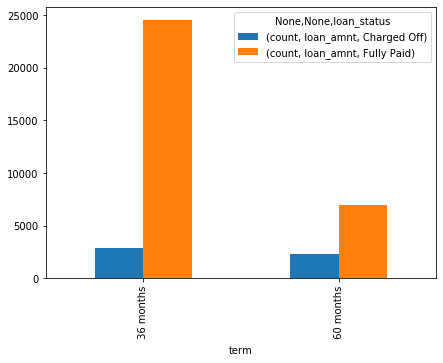

In [162]:
pd.pivot_table(df,index=["term"],columns=[df[df.loan_status!="Current"].loan_status],values=["loan_amnt"],aggfunc=["count"]).plot.bar(figsize=(7,5))

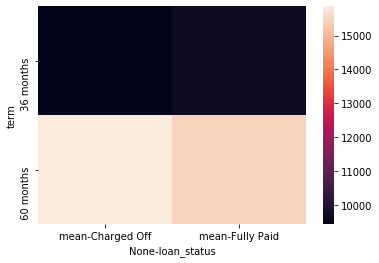

In [163]:
sns.heatmap(pd.pivot_table(index="term",columns=df[df.loan_status!="Current"].loan_status,values="loan_amnt",aggfunc=["mean"],data=df))

 **Higher loan amount are associated with longer terms**

**Maximum number of the loans are granted were for `36 months`<br>
Loans granted for `36 months` are tend to `default more` as compare to other values**

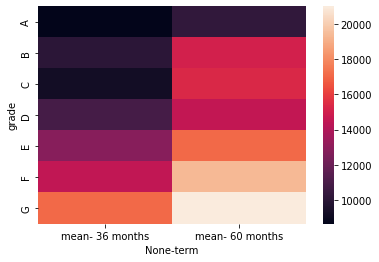

In [164]:
sns.heatmap(pd.pivot_table(index="grade",columns="term",values="loan_amnt",aggfunc=["mean"],data=df))

**Higher loan amount are associated with lower grade for longer terms**

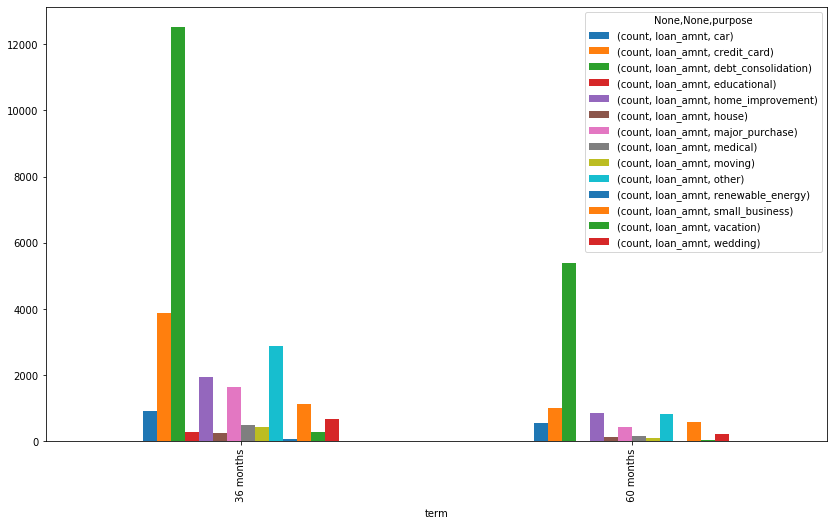

In [165]:
pd.pivot_table(df,index=["term"],columns=["purpose"],values=["loan_amnt"],aggfunc=["count"]).plot.bar(figsize=(14,8))

**`Debt Consolidation` is the highest in the number in both the term as purpose**

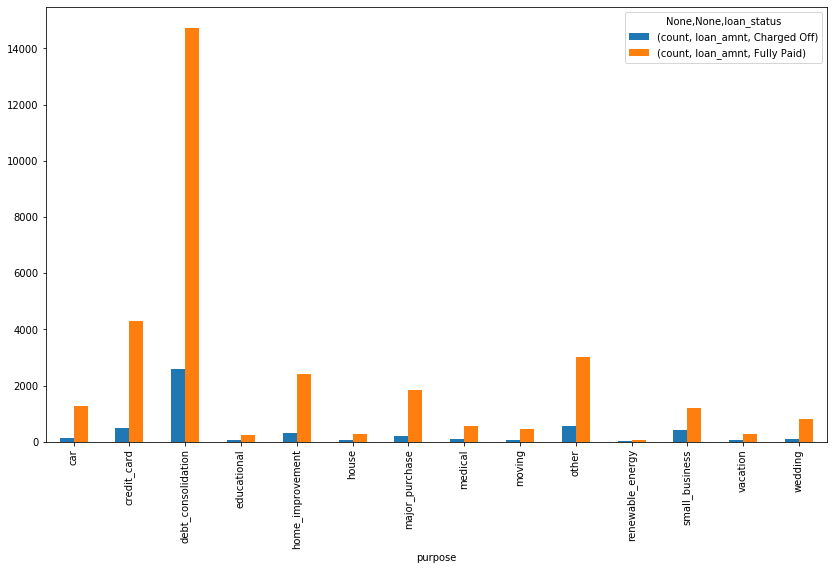

In [166]:
pd.pivot_table(df,index=["purpose"],columns=[df[df.loan_status!="Current"].loan_status],values=["loan_amnt"],aggfunc=["count"]).plot.bar(figsize=(14,8))

**Maximum number of the defaulters are also from `Debt Consolidation`**

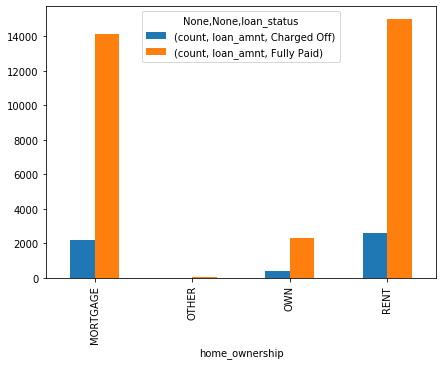

In [167]:
pd.pivot_table(df,index=["home_ownership"],columns=[df[df.loan_status!="Current"].loan_status],values=["loan_amnt"],aggfunc=["count"]).plot.bar(figsize=(7,5))

**Loans having `Mortgage` and `Rent` as their `Home Ownership` have almost similar tendency to default as compare to other values present in the column**

In [168]:
df[["loan_amnt","int_rate"]].corr()

,loan_amnt,int_rate
loan_amnt,1.000000,0.308125
int_rate,0.308125,1.000000


**Loan Amount and Interest Rate are less correalted**

In [169]:
df[["loan_amnt","total_pymnt"]].corr()

,loan_amnt,total_pymnt
loan_amnt,1.000000,0.887868
total_pymnt,0.887868,1.000000


**Loan Amount and Total Payment have high correalation**

**Let's see correlation of each numeric variable with other numeric variable**

`For that earlier we created a variale named num_lst which contains all the numeric and continuous values which is present in the dataset `

In [170]:
df[num_lst].corr()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.308125,0.929173,0.271527,0.063883,-0.034093,0.007133,0.173428,-0.047897,0.318482,...,0.192973,0.887868,0.865353,0.853322,0.729362,0.046238,0.135547,0.072648,0.449181,-0.032630
int_rate,0.308125,1.000000,0.281343,0.051927,0.108056,0.158591,0.134812,0.013469,0.097227,0.099519,...,0.135223,0.308821,0.302119,0.186231,0.531206,0.097337,0.123701,0.067313,0.157514,0.082114
installment,0.929173,0.281343,1.000000,0.271360,0.052290,-0.022612,0.007002,0.169277,-0.042947,0.314558,...,0.125691,0.858449,0.832489,0.852937,0.633621,0.057045,0.117458,0.074832,0.402250,-0.029757
annual_inc,0.271527,0.051927,0.271360,1.000000,-0.124985,0.022581,0.032946,0.156990,-0.014957,0.277996,...,0.033630,0.258134,0.250139,0.260022,0.184656,0.007783,0.021348,0.015503,0.141409,-0.012774
dti,0.063883,0.108056,0.052290,-0.124985,1.000000,-0.035834,-0.000331,0.290210,-0.005137,0.228587,...,0.035036,0.062433,0.065090,0.039363,0.103549,-0.011933,0.022383,0.009030,0.004011,0.005764
delinq_2yrs,-0.034093,0.158591,-0.022612,0.022581,-0.035834,1.000000,0.007449,0.012033,0.010576,-0.056688,...,-0.003040,-0.024452,-0.028777,-0.040624,0.022005,0.031521,0.011301,0.012673,-0.011865,0.005400
inq_last_6mths,0.007133,0.134812,0.007002,0.032946,-0.000331,0.007449,1.000000,0.092945,0.024871,-0.025898,...,-0.010122,-0.010437,-0.017588,-0.023721,0.022889,0.031596,0.018754,0.012051,0.028686,0.015469
open_acc,0.173428,0.013469,0.169277,0.156990,0.290210,0.012033,0.092945,1.000000,0.003823,0.285655,...,0.028746,0.158978,0.151352,0.156724,0.122305,-0.018395,0.015759,0.006214,0.076290,0.009264
pub_rec,-0.047897,0.097227,-0.042947,-0.014957,-0.005137,0.010576,0.024871,0.003823,1.000000,-0.059490,...,-0.014009,-0.050901,-0.053751,-0.062666,-0.005431,-0.005063,-0.005337,-0.006276,-0.032002,0.843042
revol_bal,0.318482,0.099519,0.314558,0.277996,0.228587,-0.056688,-0.025898,0.285655,-0.059490,1.000000,...,0.061124,0.294506,0.281847,0.282982,0.243181,0.005010,0.040945,0.022813,0.120840,-0.046832


**`Let's see this in a heatmap for better visualizing`**

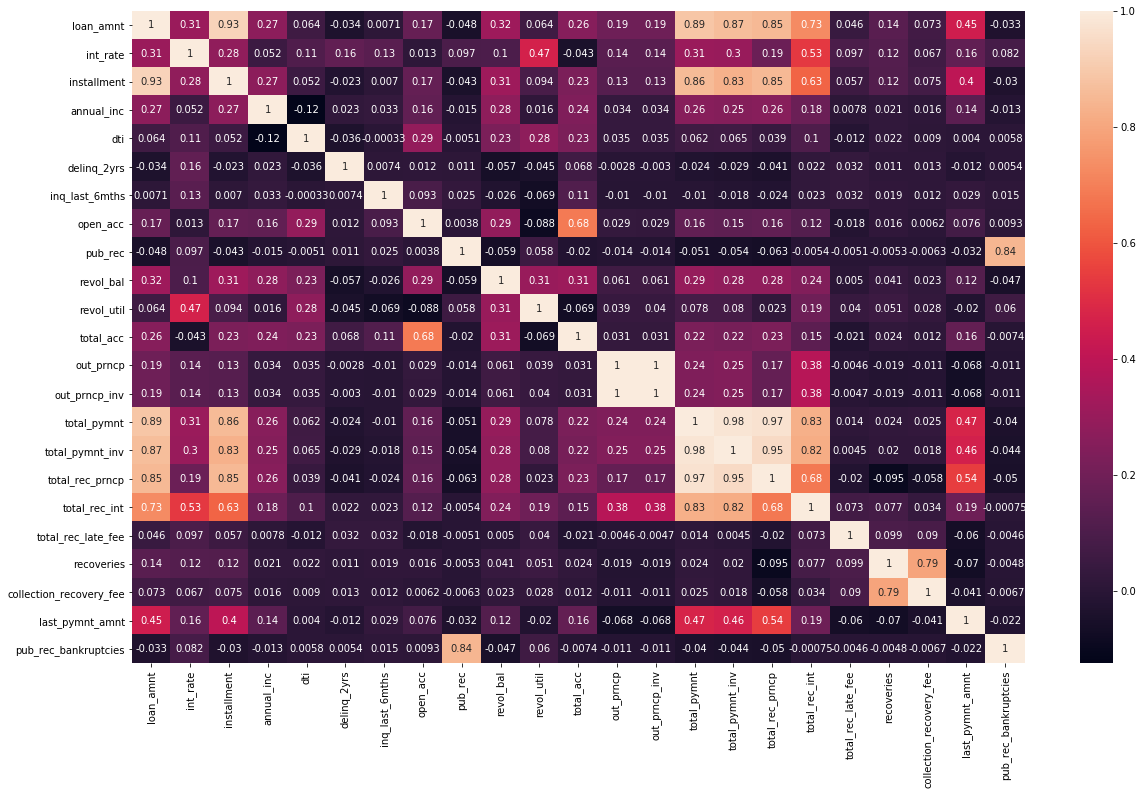

In [171]:
plt.figure(figsize=(20,12))
sns.heatmap(df[num_lst].corr(),annot=True)

**`Let us do Categorical Bivariate Analysis for more clear picture of the analysis`**

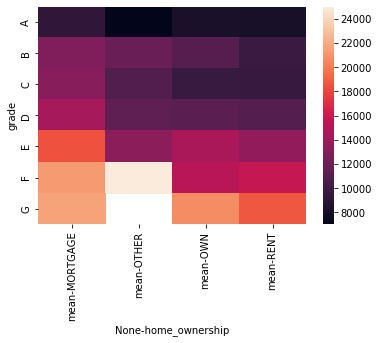

In [172]:
sns.heatmap(pd.pivot_table(index="grade",columns="home_ownership",values="loan_amnt",aggfunc=["mean"],data=df))

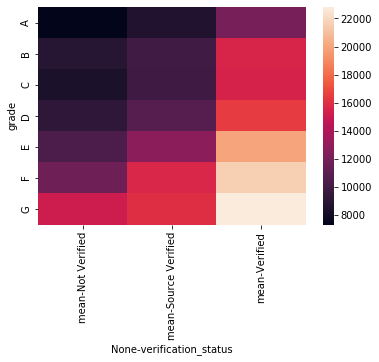

In [173]:
sns.heatmap(pd.pivot_table(index="grade",columns="verification_status",values="loan_amnt",aggfunc=["mean"],data=df))

`Across every grade Verified has got more loans as compare other values`

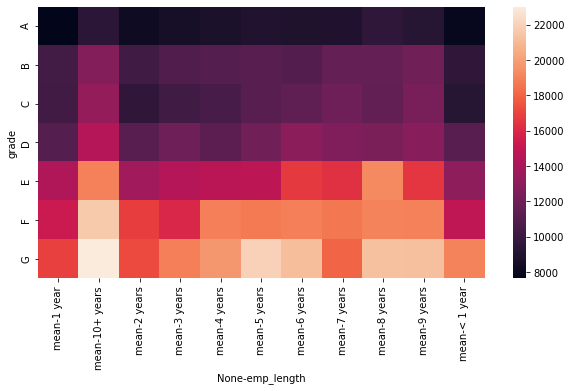

In [174]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.pivot_table(index="grade",columns="emp_length",values="loan_amnt",aggfunc=["mean"],data=df))

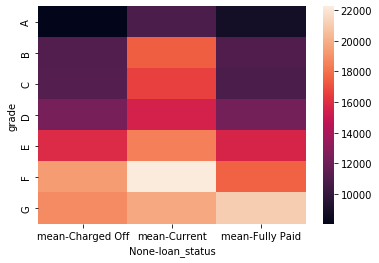

In [175]:
sns.heatmap(pd.pivot_table(index="grade",columns="loan_status",values="loan_amnt",aggfunc=["mean"],data=df))

**`Loans of with charged off value in loan status are getting more loan amount as we compare to other values present in the columns. It can be because of more loan amount they are not able to repay the loan and getting into charged off column`**

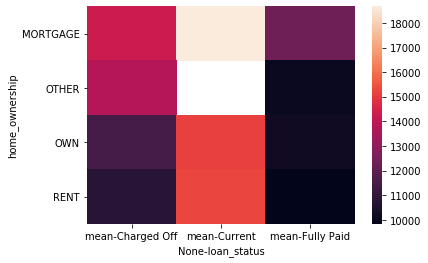

In [176]:
sns.heatmap(pd.pivot_table(index="home_ownership",columns="loan_status",values="loan_amnt",aggfunc=["mean"],data=df))

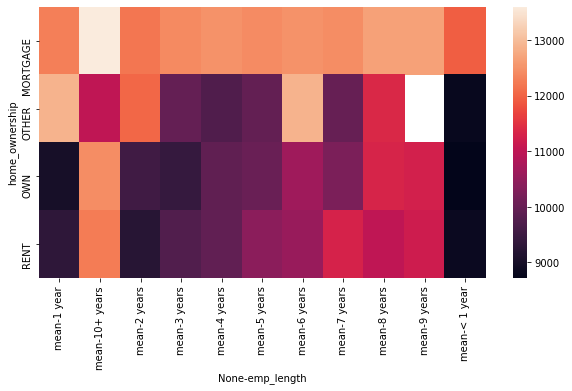

In [177]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.pivot_table(index="home_ownership",columns="emp_length",values="loan_amnt",aggfunc=["mean"],data=df))

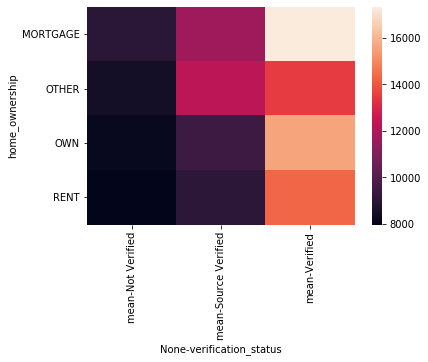

In [178]:
sns.heatmap(pd.pivot_table(index="home_ownership",columns="verification_status",values="loan_amnt",aggfunc=["mean"],data=df))

**Above all the Bivariate Analysis has been on the throughout dataset but we are more concern about how the charged off loans are doing in the dataset and find main attributes were more charged off are there**

**For that let's make a new dataset which only contains `Charged Off` values in the `Loan Status` columns for ease of writing code.<br>We are going to save that new dataset into `df2` variable**

In [179]:
df2=df[df.loan_status=="Charged Off"]

In [180]:
df2.head().T

,1,8,9,12,14
loan_amnt,2500,5600,5375,9000,10000
term,60 months,60 months,60 months,36 months,36 months
int_rate,15.27,21.28,12.69,13.49,10.65
installment,59.83,152.39,121.45,305.38,325.74
grade,C,F,B,C,B
sub_grade,C4,F2,B5,C1,B2
emp_length,< 1 year,4 years,< 1 year,< 1 year,3 years
home_ownership,RENT,OWN,RENT,RENT,RENT
annual_inc,30000,40000,15000,30000,100000
verification_status,Source Verified,Source Verified,Verified,Source Verified,Source Verified


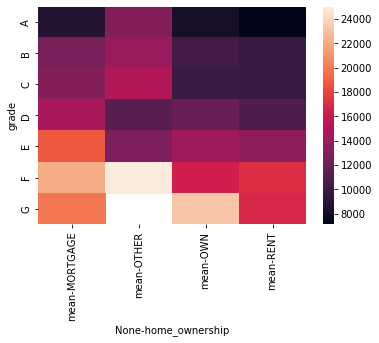

In [181]:
sns.heatmap(pd.pivot_table(index="grade",columns="home_ownership",values="loan_amnt",aggfunc=["mean"],data=df2))

**From the above plot in charged off category has the grades decreases mean loan amount for Mortgage increases that means loans with Mortgage are more likely to default and more default are increasing as decrease in grade**

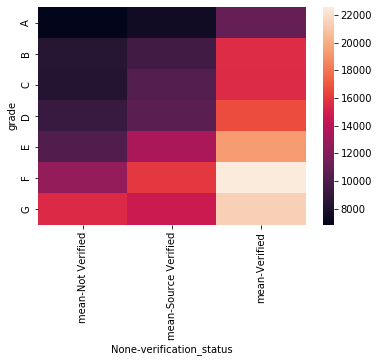

In [182]:
sns.heatmap(pd.pivot_table(index="grade",columns="verification_status",values="loan_amnt",aggfunc=["mean"],data=df2))

**From the above plot something unexpected has been found loans with verified as a verification status are more likely to default and it is increasing over decrease in grade but loans with are not verified have less default over grade as we compare with verified and source varified loans**

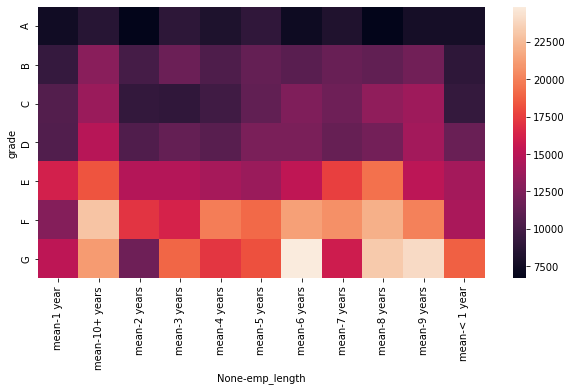

In [183]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.pivot_table(index="grade",columns="emp_length",values="loan_amnt",aggfunc=["mean"],data=df2))

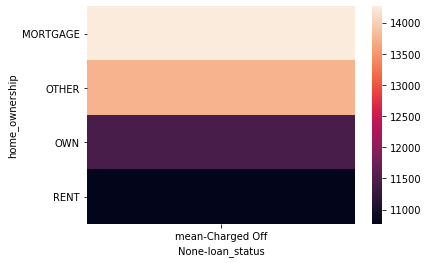

In [184]:
sns.heatmap(pd.pivot_table(index="home_ownership",columns="loan_status",values="loan_amnt",aggfunc=["mean"],data=df2))

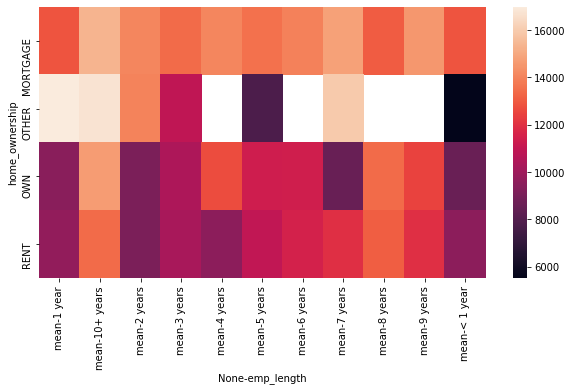

In [185]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.pivot_table(index="home_ownership",columns="emp_length",values="loan_amnt",aggfunc=["mean"],data=df2))

**Most of the loan amount are been defaulted by loans having `Mortgage` as their `home ownership` in all the `emp_length` column it has been highest**

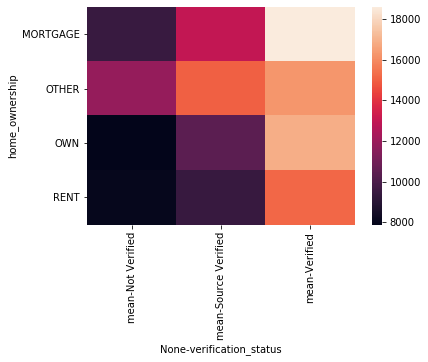

In [186]:
sns.heatmap(pd.pivot_table(index="home_ownership",columns="verification_status",values="loan_amnt",aggfunc=["mean"],data=df2))

**Most of the loan amount are been defaulted by loans having `Verified` as their `verification status` in all the `home ownership` column, it has been highest**